## Import nessecary packages.

In [1608]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression   ### new package 
from sklearn.metrics import r2_score 

## Load data.
Create a df containing the information from 'train.csv', using the pandas read_csv function.

In [1610]:
data = pd.read_csv('train.csv')

In [1611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## MSSubClass
**1. Null/Missing Values:** 0 missing values, so no replacement is needed.

**2. Original Data Type:** Integer
- Integer data type remains appropriate because there are enough unique values for it not to be a categorical variable.

**3. Number of Uniques:** 15 

**4. Data distribution:** More right skewed, meaning there a few very large values
  - In part 1, I did reshape MSSubClass. However, I have decided to change this variable into a categorical one due to what it represents.

**5. Descriptive Variables:**
mean       56.897260
min        20.000000
max       190.000000
median     50.000000
std        42.300571

15


Text(0.5, 1.0, 'Original MSSubClass Kernel Density Plot')

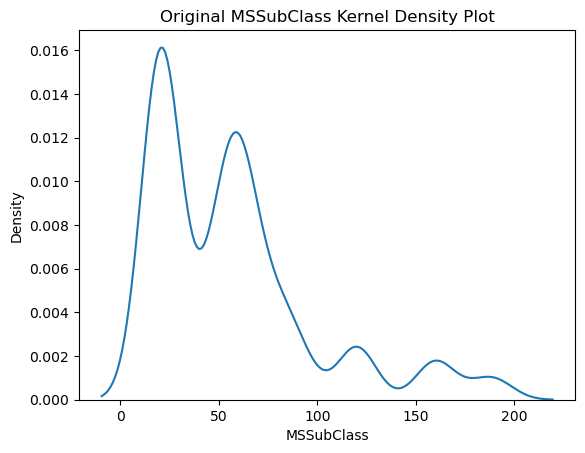

In [1613]:
#1
data.MSSubClass.isna().sum()
#3
data.MSSubClass.unique()
print(len(data.MSSubClass.unique()))
#4
sns.kdeplot(x='MSSubClass', data = data)
plt.title("Original MSSubClass Kernel Density Plot")

## Check for outliers.
Very few outliers appear to exist.

Text(0.5, 1.0, 'Original MSSubClass BoxPlot')

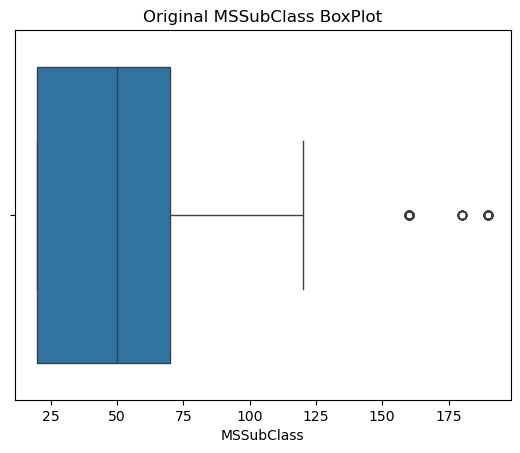

In [1615]:
sns.boxplot(x='MSSubClass', data = data)
plt.title("Original MSSubClass BoxPlot")

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.

In [1617]:
data.MSSubClass.agg(['mean','min','max','median','std'])

mean       56.897260
min        20.000000
max       190.000000
median     50.000000
std        42.300571
Name: MSSubClass, dtype: float64

## Change to categorical (Part 2)

In [1619]:
data.MSSubClass = data.MSSubClass.astype('str')

## LotFrontage
**1. Null/Missing Values:** 259 missing values

Replace missing values with the median of the column, due to the right skewness of the data.

**2. Original Data Type:** Float

Change to integer data type so we are able to perform mathematical calculations. 


**3. Number of Uniques:** 111 unique values
- No need to change to categorical variable

**4. Data distribution:** More right skewed, meaning there a few very large values. There are also outliers on both ends of the data.
  - Reshaping: using log method to transform data distribution closer to a normal distribution.

**5. Descriptive Variables:**
mean       70.049958
min        21.000000
max       313.000000
median     69.000000
std        24.284752

In [1621]:
#1
data.LotFrontage.isna().sum()
#3
data.LotFrontage.unique()
print(len(data.LotFrontage.unique()))

111


## Data Distribution
The kdeplot shows that the LotFrontage data is slightly right skewed and needs to be handled for modeling.

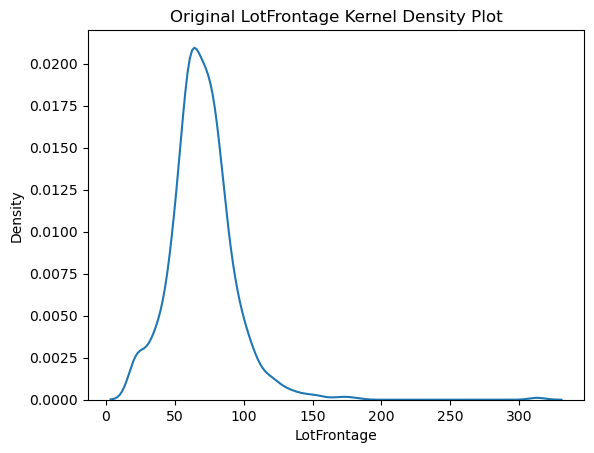

In [1623]:
sns.kdeplot(x='LotFrontage', data = data)
plt.title("Original LotFrontage Kernel Density Plot")
plt.show()

## Check for outliers.
The boxplot shows that outliers exist above and below fences.

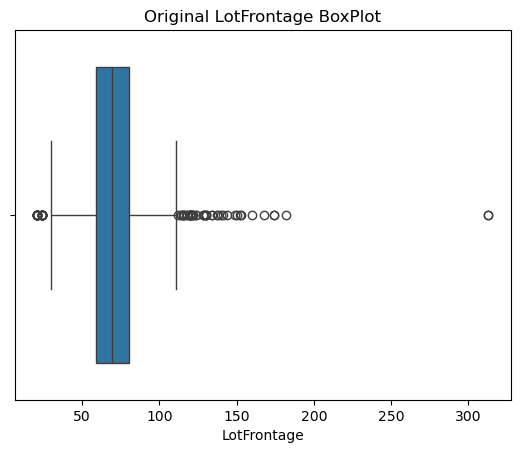

In [1625]:
sns.boxplot(x='LotFrontage', data = data)
plt.title("Original LotFrontage BoxPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.

In [1627]:
#5 
data.LotFrontage.agg(['mean','min','max','median','std'])

mean       70.049958
min        21.000000
max       313.000000
median     69.000000
std        24.284752
Name: LotFrontage, dtype: float64

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.
STEP 1) Create target_column (contains the column with the missing values) and all_columns (including the columns we will use for linear regression)

In [1629]:
target_column = 'LotFrontage'  
all_columns = ["LotFrontage", "LotArea", "GrLivArea", "Neighborhood"]
Data = data[all_columns]
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   Neighborhood  1460 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 45.8+ KB


## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.
STEP 2) One-hot encode categorical columns (in this case, Neighborhood) 

In [1631]:
Data = pd.get_dummies(Data, prefix_sep='_', columns=["Neighborhood"], 
                                 drop_first=True, dtype='int')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1201 non-null   float64
 1   LotArea               1460 non-null   int64  
 2   GrLivArea             1460 non-null   int64  
 3   Neighborhood_Blueste  1460 non-null   int64  
 4   Neighborhood_BrDale   1460 non-null   int64  
 5   Neighborhood_BrkSide  1460 non-null   int64  
 6   Neighborhood_ClearCr  1460 non-null   int64  
 7   Neighborhood_CollgCr  1460 non-null   int64  
 8   Neighborhood_Crawfor  1460 non-null   int64  
 9   Neighborhood_Edwards  1460 non-null   int64  
 10  Neighborhood_Gilbert  1460 non-null   int64  
 11  Neighborhood_IDOTRR   1460 non-null   int64  
 12  Neighborhood_MeadowV  1460 non-null   int64  
 13  Neighborhood_Mitchel  1460 non-null   int64  
 14  Neighborhood_NAmes    1460 non-null   int64  
 15  Neighborhood_NPkVill 

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.
STEP 3) Create data_complete, containing all the non-null values of the target column and data_missing, which contains rows WITH missing values.

In [1633]:
Data_complete = Data.dropna(subset=[target_column])
Data_missing = Data[Data[target_column].isnull()]

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.
STEP 4) Create predictor, containing all columns that are NOT the target columm. We will also create X and y train datasets.

In [1635]:
predictor_columns = [col for col in Data.columns if col != target_column]
X_train = Data_complete[predictor_columns]
y_train = Data_complete[target_column]

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.

STEP 4) Perform linear regression using LinearRegression() function.

In [1637]:
model = LinearRegression()   
model.fit(X_train, y_train)

LinearRegression()

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.

STEP 5) Calculate the Estimates by using the predict() function and the error residual value in order to calculate the r2.

In [1639]:
Data_complete["Estimated_LotFrontage"] = model.predict(X_train)
Data_complete["Error_Residual"] = Data_complete.LotFrontage - Data_complete.Estimated_LotFrontage
r_squared = r2_score(Data_complete.LotFrontage, Data_complete.Estimated_LotFrontage)
r_squared

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3481144312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_complete["Estimated_LotFrontage"] = model.predict(X_train)
/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3481144312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_complete["Error_Residual"] = Data_complete.LotFrontage - Data_complete.Estimated_LotFrontage


0.3898673074050102

## Handle LotFrontage missing values
We will replace the missing values in the LotFrontage column using linear regression.

STEP 6) Replace missing values with predicted values from the LinearRegression.

In [1641]:
X_test = Data_missing[predictor_columns]
predicted_values = model.predict(X_test)
data.loc[data[target_column].isnull(), target_column] = predicted_values

## Change to integer datatype
...so the column can be used for mathematical calculations.

In [1643]:
data.LotFrontage = data.LotFrontage.astype('int')

## Handle LotFrontage skewness 
The distribution of this column is right skewed. To clean this, I will apply a non-linear transformation of the column using log to remove the more extreme values causing the skew.

In [1645]:
data["LotFrontage"] = np.log(data.LotFrontage)

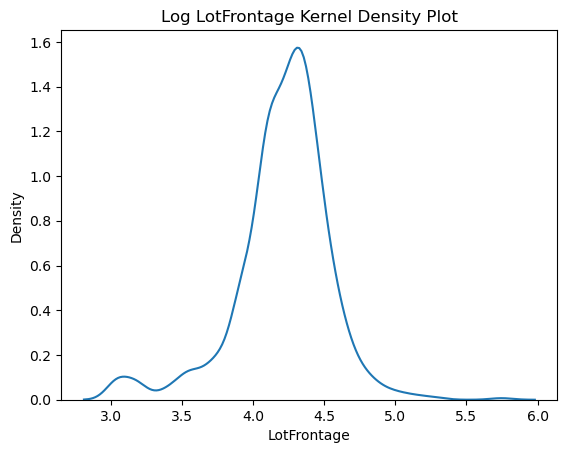

In [1646]:
sns.kdeplot(x='LotFrontage', data = data)
plt.title("Log LotFrontage Kernel Density Plot")
plt.show()

## Handle Outliers 
To handle the existing outliers in LotFrontage, I will use 3std medain replacement to replace outliers.

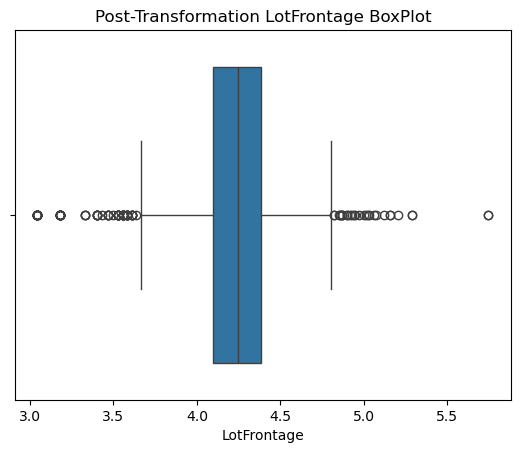

In [1648]:
sns.boxplot(x='LotFrontage', data = data)
plt.title("Post-Transformation LotFrontage BoxPlot")
plt.show()

## Handle Outliers 
First, identify the outliers and set the upper and lower fences.

In [1650]:
Q1 = data.LotFrontage.quantile(q = .25)
Q3 =  data.LotFrontage.quantile(q = .75)
IQ = Q3 - Q1
Lower_Fence_IQR = Q1 - 1.5*IQ
Upper_Fence_IQR = Q3 + 1.5*IQ
print("Median      " + str(data.LotFrontage.median()))
print("Lower Fence " + str(Lower_Fence_IQR))
print("Upper Fence " + str(Upper_Fence_IQR))
print("Min         " + str(data.LotFrontage.min()))
print("Max         " + str( data.LotFrontage.max()))



Median      4.248495242049359
Lower Fence 3.6628214535444292
Upper Fence 4.813549743351553
Min         3.044522437723423
Max         5.746203190540153


## Handle Outliers
Then, replace outliers beyond each fence with the median.

In [1652]:
median = data.LotFrontage.median()
data["LotFrontage_median_IQR"] = data.LotFrontage
data.loc[data.LotFrontage_median_IQR < Lower_Fence_IQR, "LotFrontage_median_IQR"] = median
data.loc[data.LotFrontage_median_IQR > Upper_Fence_IQR, "LotFrontage_median_IQR"] = median

## NEW Visualization after Cleaning

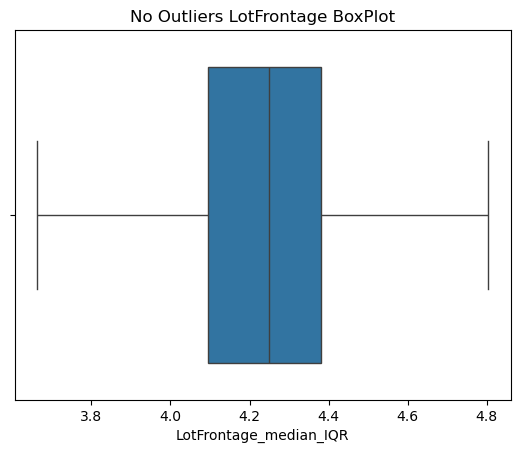

In [1654]:
sns.boxplot(x='LotFrontage_median_IQR', data = data)
plt.title("No Outliers LotFrontage BoxPlot")
plt.show()

## LotArea
**1. Null/Missing Values:** 0 missing values
No replacement is needed.


**2. Original Data Type:** Integer
No need to change the data type.

**3. Number of Uniques:** 1073 unique values
- No need to change to categorical variable

**4. Data distribution:** VERY right skewed, meaning there a few very large values. There are also outliers on the left end of the data, which makes sense because the skewness tells us that there are some very large values.
  - Reshaping: using log method to transform data distribution closer to a normal distribution.

**5. Descriptive Variables:**
mean       10516.828082
min         1300.000000
max       215245.000000
median      9478.500000
std         9981.264932

In [1656]:
#1
data.LotArea.isna().sum()
#3
data.LotArea.unique()
print(len(data.LotArea.unique()))

1073


## Data Distribution
The data for the LotArea column is very right skewed & needs to be handled.

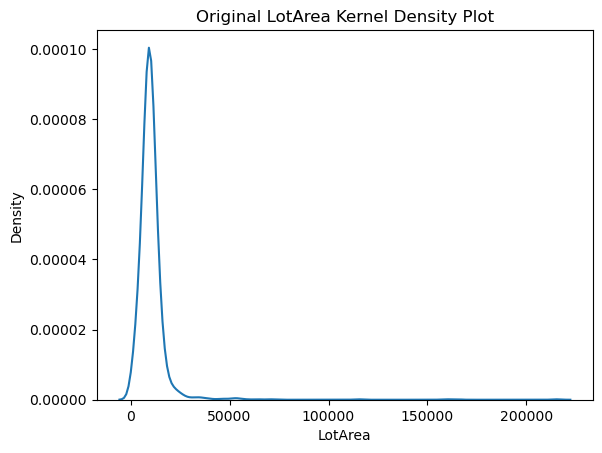

In [1658]:
sns.kdeplot(x='LotArea', data = data)
plt.title("Original LotArea Kernel Density Plot")
plt.show()

## Check for outliers
Outliers exist both above the upper fence and below the lower fence and need to be handled.

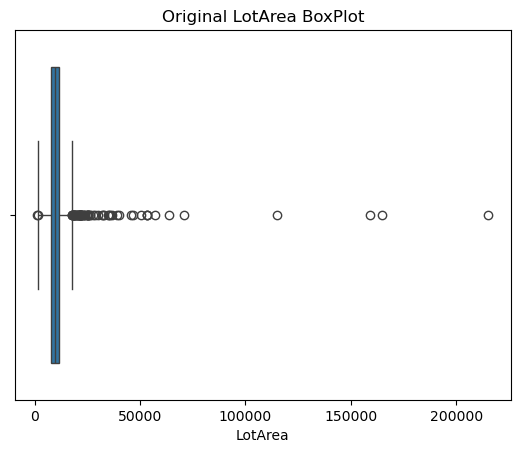

In [1660]:
sns.boxplot(x='LotArea', data = data)
plt.title("Original LotArea BoxPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.

The summary statistics futher indicate that outliers exist (max is much higher than median) and that they need to be handled before modeling.

In [1662]:
data.LotArea.agg(['mean','min','max','median','std'])

mean       10516.828082
min         1300.000000
max       215245.000000
median      9478.500000
std         9981.264932
Name: LotArea, dtype: float64

## Handle LotArea skewness 
The distribution of this column is right skewed. To clean this, I will apply a non-linear transformation of the column using log10 to remove the more extreme values causing the skew.

In [1664]:
data["LotArea"] = np.log(data.LotArea)

## Outliers still exist

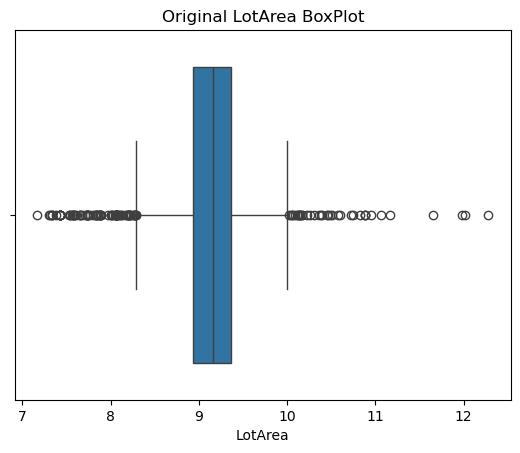

In [1666]:
sns.boxplot(x='LotArea', data = data)
plt.title("Original LotArea BoxPlot")
plt.show()

## Handle outliers
To handle outliers in the LotArea, we will use winsorizing to replace more extreme values with less extreme values.

In [1668]:
from scipy.stats.mstats import winsorize
Win_fraction = 0.01

data["LotArea_Winsorize"] = data.LotArea
data['LotArea_Winsorize'] = winsorize(data['LotArea_Winsorize'], limits=[0.05, 0.05])

## NEW Winsorized BoxPlot

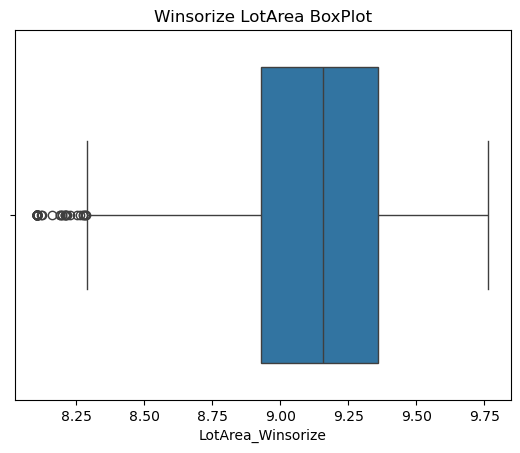

In [1670]:
sns.boxplot(x='LotArea_Winsorize', data = data)
plt.title("Winsorize LotArea BoxPlot")
plt.show()

## NEW Visualization of LotArea after Cleaning

Text(0.5, 1.0, 'Transformed LotFrontage Kernel Density Plot')

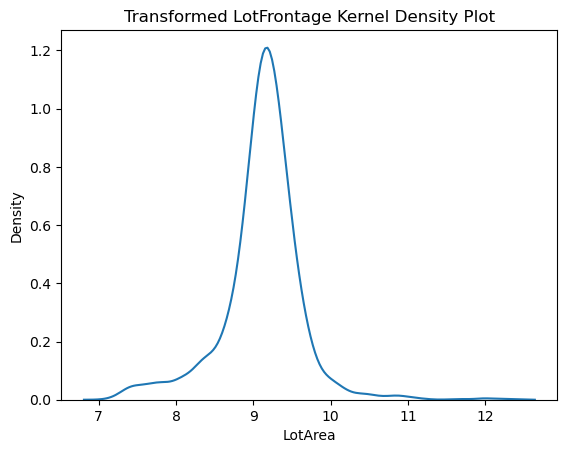

In [1672]:
sns.kdeplot(x='LotArea', data = data)
plt.title("Transformed LotFrontage Kernel Density Plot")

## Street
**1. Null/Missing Values:** 0 missing values

No replacement is needed.


**2. Original Data Type:** Object

No need to change the data type.

**3. Number of Uniques:** 2 unique values

- Is already a categorical variable. We can drop this column because it does not have enough variance or enough information to provide value in the analysis.

**4. Data distribution:** The majority of occurences are in the "Pave" street type. 

**5. Descriptive Variables:**: Due to the low amount of variance in the column, we can determine that is does not provide enough information to be signifigant in analysis.

Pave    1454
Grvl       6


In [1674]:
#1
data.Street.isna().sum()
#3
data.Street.unique()
print(len(data.Street.unique()))

2


## Data Distribution
Most of the occurences are in the Pave category, very little variance within the column.

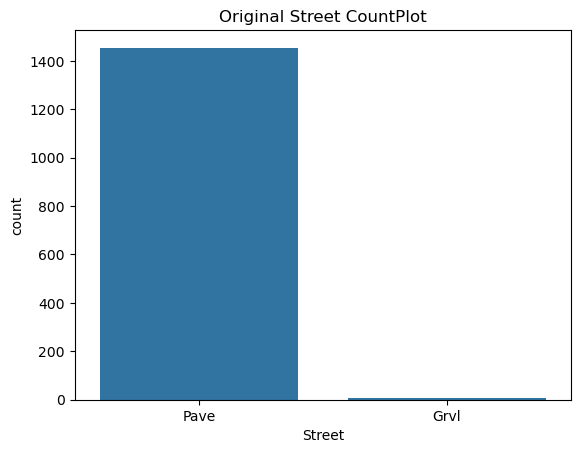

In [1676]:
sns.countplot(x='Street', data = data)
plt.title("Original Street CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1678]:
data.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

## Drop Street column 
Does not provide signifigant information for analysis due to the low variation in value occurences.

In [1680]:
data.drop(columns = ["Street"], inplace = True)

## LotConfig
**1. Null/Missing Values:** 0 missing values

No replacement is needed.



**2. Original Data Type:** Object


**3. Number of Uniques:** 5 unique values

**4. Data distribution:**: Most of the occurences are in the "Inside" category level.

**5. Descriptive Variables:** The FR3 LotConfig category level has only 4 occurences, making this category underepresented. To correct this, I collapsed the FR3 occurences into the mode of the column, the most frequently occuring, which was "Inside."

Inside     1052

Corner      263

CulDSac      94

FR2          47

FR3           4

In [1682]:
#1
data.LotConfig.isna().sum()
#3
data.LotConfig.unique()
print(len(data.LotConfig.unique()))

5


## Data Distribution

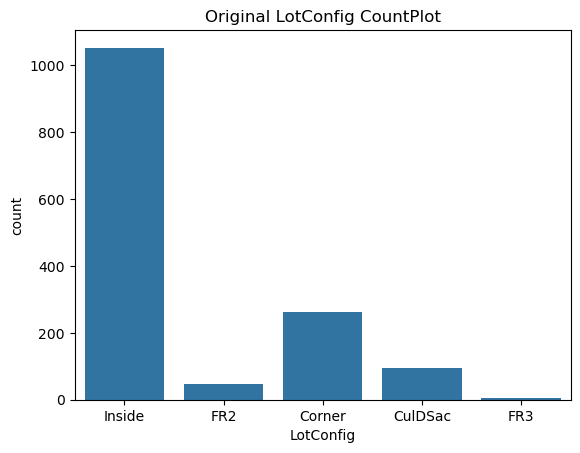

In [1684]:
sns.countplot(x='LotConfig', data = data)
plt.title("Original LotConfig CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1686]:
#5 
data.LotConfig.value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

## Handle underepresented FR3 category 
We will clean this column by collapsing underepresented category levels into the most frequently occuring cateogry, "Inside."

In [1688]:
data.loc[data["LotConfig"] == "FR3", "LotConfig"] = "Inside"
data.LotConfig.value_counts()

LotConfig
Inside     1056
Corner      263
CulDSac      94
FR2          47
Name: count, dtype: int64

## NEW Visualization after Cleaning

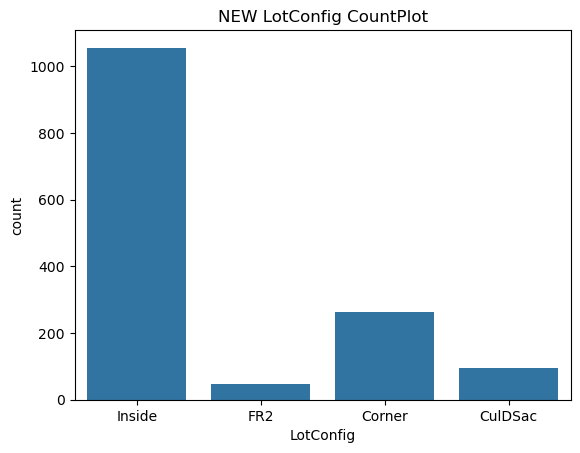

In [1690]:
sns.countplot(x='LotConfig', data = data)
plt.title("NEW LotConfig CountPlot")
plt.show()

## LandSlope
**1. Null/Missing Values:** 0 missing values

No replacement is needed.



**2. Original Data Type:** Object


**3. Number of Uniques:** 3 unique values

**4. Data distribution:**: Most of the occurences are in the "Gtl" category level.

**5. Descriptive Variables:**  The "Sev" category is unrepresented with only 13 occurences and needs to be cleaned before modeling can occur. Due to the categorical nature of the variable, I will collapse it into the most frequently occuring cateogry within the column. In this case, all "Sev" occurences become "Gtl".

Gtl    1382
Mod      65
Sev      13


In [1692]:
#1
data.LandSlope.isna().sum()
#3
data.LandSlope.unique()
print(len(data.LandSlope.unique()))

3


## Data Distribution

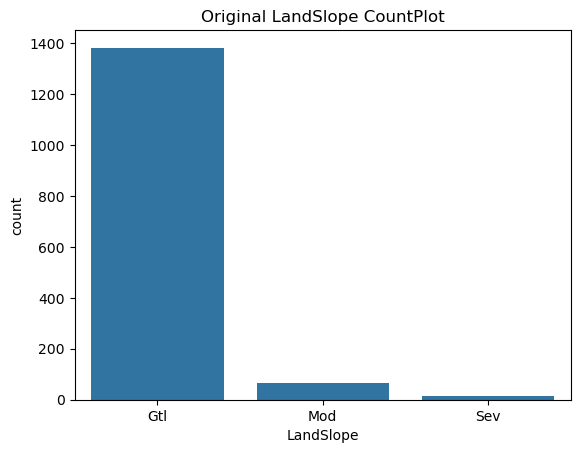

In [1694]:
sns.countplot(x='LandSlope', data = data)
plt.title("Original LandSlope CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1696]:
data.LandSlope.value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

## Handle underepresented "Sev" category 
We will clean this column by collapsing underepresented category levels into the most frequently occuring cateogry, "Gtl."

In [1698]:
data.loc[data["LandSlope"] == "Sev", "LandSlope"] = "Gtl"
data.LandSlope.value_counts()

LandSlope
Gtl    1395
Mod      65
Name: count, dtype: int64

## NEW Visualization after Cleaning 
We can visualize the changes made to this data by looking at a counplot of the cleaned column.

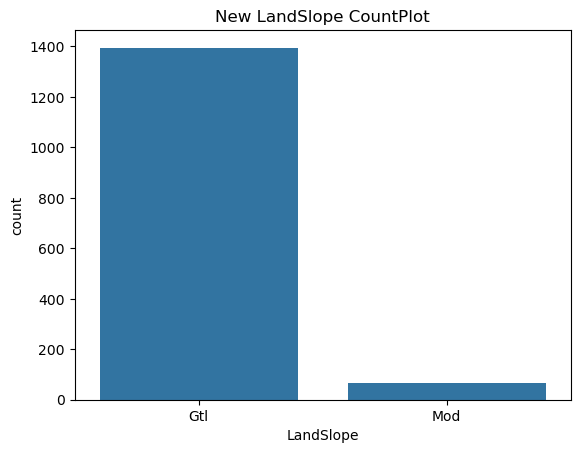

In [1700]:
sns.countplot(x='LandSlope', data = data)
plt.title("New LandSlope CountPlot")
plt.show()

## Neighborhood
**1. Null/Missing Values:** 0 missing values

No replacement is needed.



**2. Original Data Type:** Object


**3. Number of Uniques:** 25 unique values

**4. Data distribution:**: Of the 25 neighborhoods in the dataset, NAmes, CollgCr, OldTown and Edwards seem to have the most. 

**5. Descriptive Variables:** There are a few categories that are underepresented, including Veenker(11), NPkVill(9), Blueste(2). To handle this, I created a new cateogry called "Other" and placed all categories with less than 15 occurences in it.



In [1702]:
#1
data.Neighborhood.isna().sum()
#3
data.Neighborhood.unique()
print(len(data.Neighborhood.unique()))

25


## Data Distribution

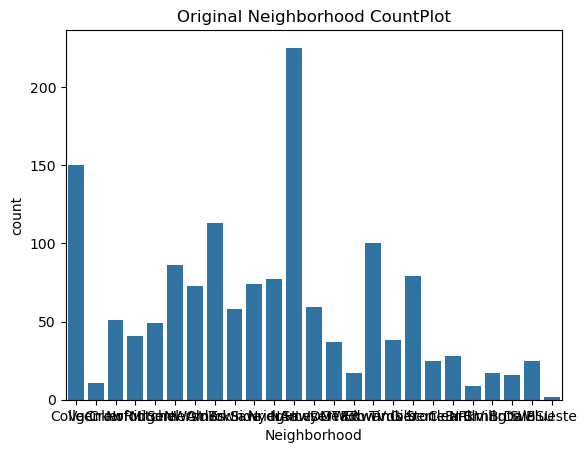

In [1704]:
sns.countplot(x='Neighborhood', data = data)
plt.title("Original Neighborhood CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1706]:
data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

## Handle underepresented neighborhoods.
STEP 1) Create variables that include underepresented neighborhoods to use in lambda replacement function.

In [1708]:
neighborhood_counts =data['Neighborhood'].value_counts()
neighborhood_counts_less_than_11 =neighborhood_counts[neighborhood_counts<=11].index.tolist()
neighborhood_counts_less_than_11

['Veenker', 'NPkVill', 'Blueste']

## Handle underepresented neighborhoods.
STEP 2) Use lambda to put any neighborhoods with less than 11 occurences into a new cateogory called "Others."

In [1710]:
data['Neighborhood'] = \
data['Neighborhood'].apply(lambda x: 'Others' if x in neighborhood_counts_less_than_11 else x)
data['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Others      22
MeadowV     17
Blmngtn     17
BrDale      16
Name: count, dtype: int64

## New countplot after cleaning the column
We can visualize the changes made to this data by looking at a counplot of the cleaned column.

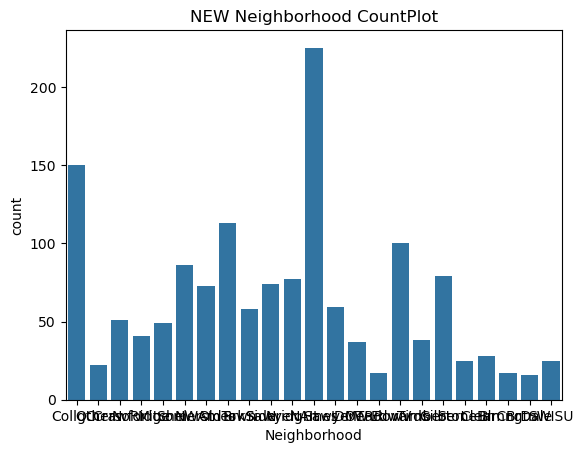

In [1712]:
sns.countplot(x='Neighborhood', data = data)
plt.title("NEW Neighborhood CountPlot")
plt.show()

## OverallQual
**1. Null/Missing Values:** 0 missing values

No replacement is needed.



**2. Original Data Type:** Intger

- I changed this columns data type to string because there are only 10 unique values. This low number of unique values means that the column can be treated as a categorical variable.


**3. Number of Uniques:** 10 unique values, but all are integers. 

**4. Data distribution:**: After changing the column to a cateogiral variable rather than an integer, I was able to observe that the 1 and 2 levels had less than 10 occurences and needed to be changed. To handle this, I grouped the two levels into a new one called "3 or less."

**5. Descriptive Variables:** 
BEFORE CHANGING TO CATEGORICAL:
min        1.000000
max       10.000000
mean       6.099315
std        1.382997
median     6.000000

AFTER CHANGING TO CATEGORICAL:
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2

10


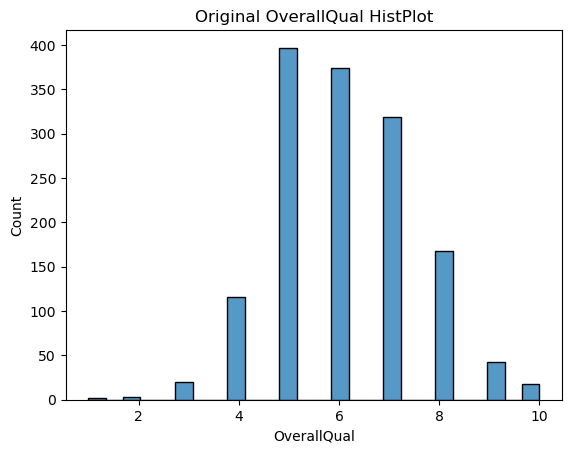

In [1714]:
#1
data.OverallQual.isna().sum()
#3
data.OverallQual.unique()
print(len(data.OverallQual.unique()))
#4
sns.histplot(x='OverallQual', data = data)
plt.title("Original OverallQual HistPlot")
plt.show()

## Kdeplot to observe data distribution
However, this will be irrelevant after changing the column to a categorical variable.

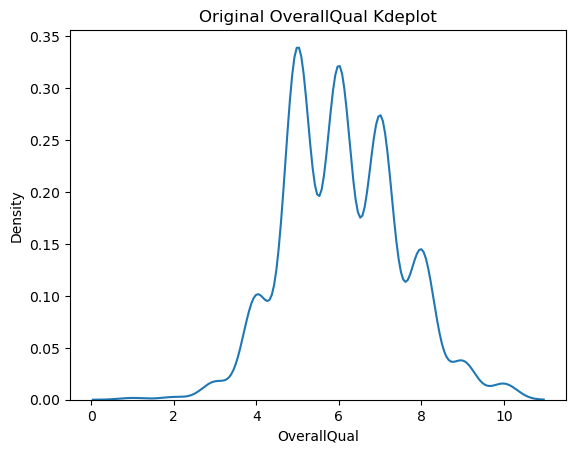

In [1716]:
sns.kdeplot(x='OverallQual', data = data)
plt.title("Original OverallQual Kdeplot")
plt.show()

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.

In [1718]:
data.OverallQual.agg(['min','max','mean','std','median'])

min        1.000000
max       10.000000
mean       6.099315
std        1.382997
median     6.000000
Name: OverallQual, dtype: float64

## Change OverallQual's data type 
to string in order to make it a categorical variable.

In [1720]:
data.OverallQual = data.OverallQual.astype('str')

## Analyze descriptive statistics (as Categorical)  to identify any underepresented categories.

In [1722]:
data.OverallQual.value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

## Handle underepresented categories by grouping into new category called "Less than 3"

In [1724]:
print(data["OverallQual"].unique())

['7' '6' '8' '5' '9' '4' '10' '3' '1' '2']


In [1725]:
data.loc[data["OverallQual"].isin(["1", "2"]), "OverallQual"] = "Less than 3"

In [1726]:
data.OverallQual.value_counts()

OverallQual
5              397
6              374
7              319
8              168
4              116
9               43
3               20
10              18
Less than 3      5
Name: count, dtype: int64

## New CountPlot after cleaning

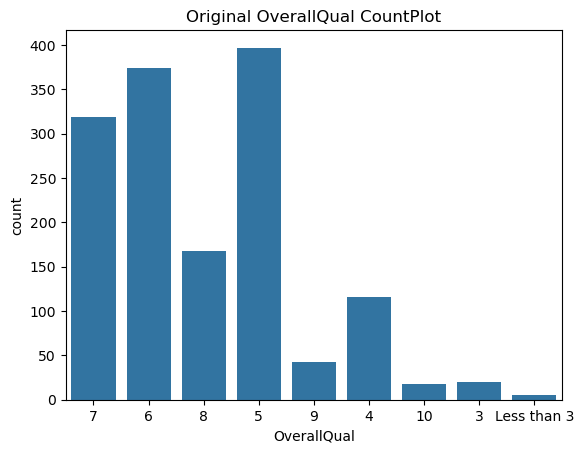

In [1728]:
sns.countplot(x='OverallQual', data = data)
plt.title("Original OverallQual CountPlot")
plt.show()

## Condition1
**1. Null/Missing Values:** 0 missing values

No replacement is needed.



**2. Original Data Type:** Object/Categorical

- The object/categorical datatype is appropriate due to the low number of unique values and their string datatype. No change needed.

**3. Number of Uniques:** 9 unique values.

**4. Data distribution:**: The majority of occurneces are in the "Norm" cateogory. 

**5. Descriptive Variables:** I was able to observe that the PosA, RRNn and RRNe categories had less than 10 occurences and needed to be changed. To handle this, I grouped the levels into a new one called "Others." I did this because these categories all seemed to have very low levels of correlation to SalePrice, our target variable.

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2

9


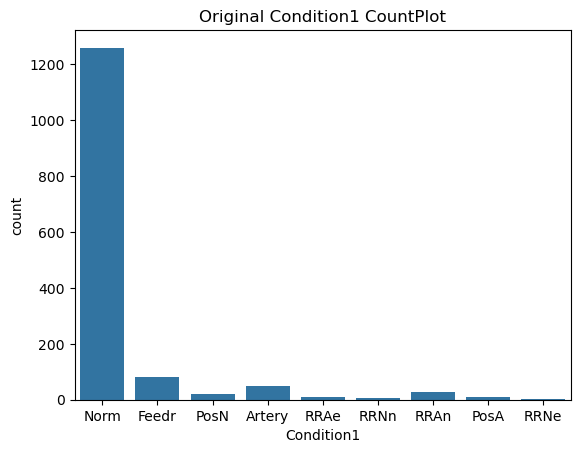

In [1730]:
#1
data.Condition1.isna().sum()
#3
data.Condition1.unique()
print(len(data.Condition1.unique()))
#4
sns.countplot(x='Condition1', data = data)
plt.title("Original Condition1 CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1732]:
data.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

## Underepresented Cateogry Handling 
**We will replace the underepresented categories (PosA, RRNn, RRNe) with a category that has a similar correlation with SalePrice, our target variable.**

**Examine Condition1 correlations with SalePrice**

STEP 1) One-Hot Encoding of the Condition 1 column to eventually observe correlations with SalePrice in order to determine what to replace underepresnted columns with.

In [1734]:
Condition1_columns = pd.get_dummies(data["Condition1"], dtype = int)
Condition1_columns.head()

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


## Underepresented Category Handling 
STEP 2) Add SalePrice to new Condition1_columns df for correlation comparison.

In [1736]:
Condition1_columns["SalePrice"] = data["SalePrice"]
Condition1_columns.head()

,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,SalePrice
0,0,0,1,0,0,0,0,0,0,208500
1,0,1,0,0,0,0,0,0,0,181500
2,0,0,1,0,0,0,0,0,0,223500
3,0,0,1,0,0,0,0,0,0,140000
4,0,0,1,0,0,0,0,0,0,250000


## Underepresented Category Handling 
STEP 3) Plot SalePrice and Condition 1 category correlations on a heatmap.

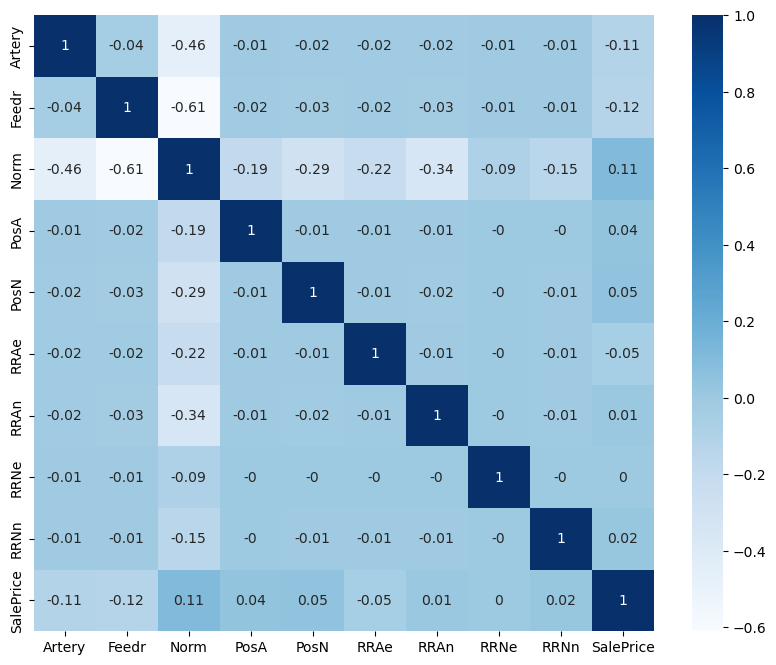

In [1738]:
plt.figure(figsize=(10, 8))  # Adjust width and height of the plot area 
sns.heatmap(Condition1_columns.corr().round(2), annot = True, cmap="Blues")   ### this pass a correlation matrix generated for the 
plt.show()

Here, we can see that PosN and the RRNe and RRNn categorie have very low correlation levels with SalePrice.

## Underepresented Category Handling 

**Group underepresented categories into new "Others" category.**

1) Create variables containing Condition1 categories with less than 10 occurences to be used in the lambda replacement.

In [1741]:
condition_counts =data['Condition1'].value_counts()
condition_counts_less_than_10 =condition_counts[condition_counts<=10].index.tolist()
condition_counts_less_than_10

['PosA', 'RRNn', 'RRNe']

## Underepresented Category Handling 

2) Use lambda function to replace undereprestned categories into new "Others" category 

In [1743]:
data['Condition1'] = \
data['Condition1'].apply(lambda x: 'Others' if x in condition_counts_less_than_10 else x)
data['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
Others      15
RRAe        11
Name: count, dtype: int64

## New Countplot after Cleaning

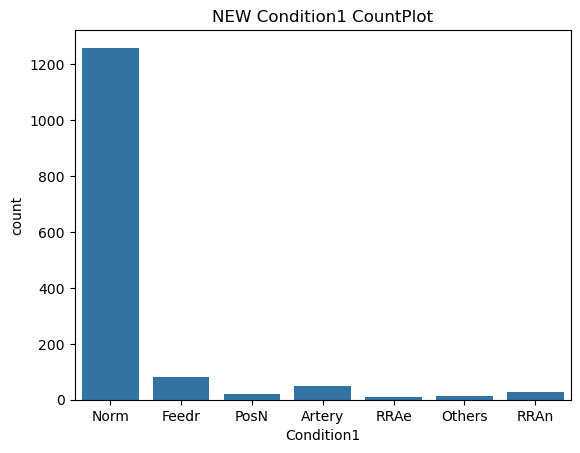

In [1745]:
sns.countplot(x='Condition1', data = data)
plt.title("NEW Condition1 CountPlot")
plt.show()

## Alley
**1. Null/Missing Values:** 1369 missing values

Replace with "No Alley." We can assume a NA value indicates that the property does not have an alley.

**2. Original Data Type:** Object/Categorical

- The object/categorical datatype is appropriate due to the low number of unique values and their string datatype. No change needed.

**3. Number of Uniques:** 2 unique values.

**4. Data distribution:**: More Grvl than Pave alley types

**5. Descriptive Variables:** Most of the occurences are missing. In this case, we can assume this means the property does not have an alley.

Grvl    50
Pave    41

3


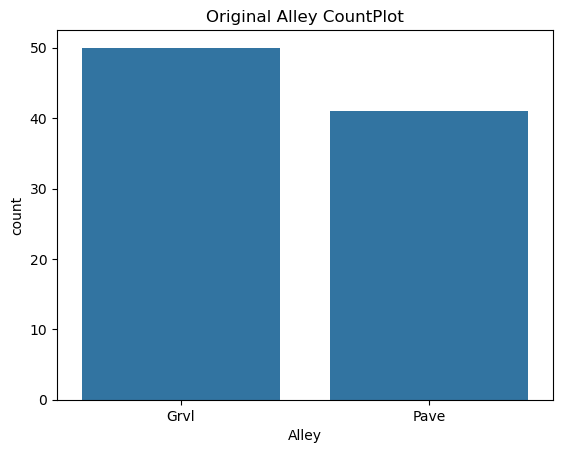

In [1747]:
#1
data.Alley.isna().sum()
#3
data.Alley.unique()
print(len(data.Alley.unique()))
#4
sns.countplot(x='Alley', data = data)
plt.title("Original Alley CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1749]:
data.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

## Replacement of missing values.
In this case, we will replace any missing or null values with the string "No Alley."

In [1751]:
data.Alley.fillna("No Alley", inplace = True)

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/1496063259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Alley.fillna("No Alley", inplace = True)


## Confirm replacement occured

In [1753]:
data.Alley.isna().sum()

0

## NEW Visualization after Cleaning

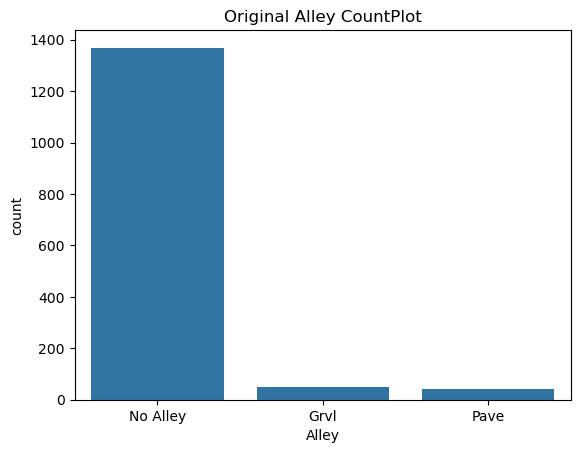

In [1755]:
sns.countplot(x='Alley', data = data)
plt.title("Original Alley CountPlot")
plt.show()

## ExterQual
**1. Null/Missing Values:** 0 missing values

No replacement needed! 

**2. Original Data Type:** Object/Categorical

- The object/categorical datatype is appropriate due to the low number of unique values and their string datatype. No change needed.

**3. Number of Uniques:** 4 unique values.

**4. Data distribution:**: The majority of values are "TA" in ExterQual.

**5. Descriptive Variables:** While the Ex and Fa categories have LESS occurences, they both have more than 10 and are considered signifigant and do not need to be replaced.


TA    906

Gd    488

Ex     52

Fa     14

4


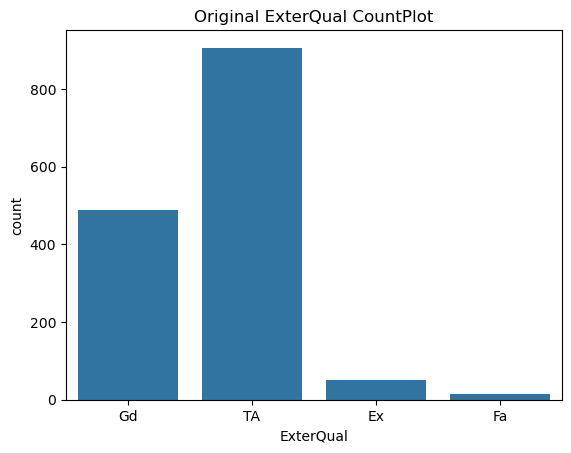

In [1757]:
#1
data.ExterQual.isna().sum()
#3
data.ExterQual.unique()
print(len(data.ExterQual.unique()))
#4
sns.countplot(x='ExterQual', data = data)
plt.title("Original ExterQual CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1759]:
data.ExterQual.value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

## Foundation
**1. Null/Missing Values:** 0 missing values

No replacement needed! 

**2. Original Data Type:** Object/Categorical

- The object/categorical datatype is appropriate due to the low number of unique values and their string datatype. No change needed.

**3. Number of Uniques:** 6 unique values.

**4. Data distribution:**: The majority of values are "PConc" and 'CBlock' categories. 

**5. Descriptive Variables:** The 'Stone' and 'Wood' categories have less than 10 occurences and will need to be replaced. Replacing them with another category would be inaccurate, as the foundation type for these properties are Stone & Wood, so I will re-categorize them into an "Others" category.

PConc     647

CBlock    634

BrkTil    146

Slab       24

Stone       6

Wood        3

6


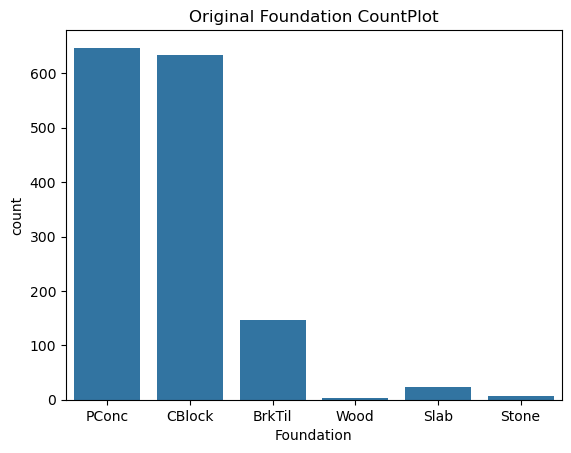

In [1761]:
#1
data.Foundation.isna().sum()
#3
data.Foundation.unique()
print(len(data.Foundation.unique()))
#4
sns.countplot(x='Foundation', data = data)
plt.title("Original Foundation CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().

In [1763]:
data.Foundation.value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

## Handle underepresented categories.
STEP 1) Create variables that include underepresented categories to use in lambda replacement function.

In [1765]:
foundation_counts =data['Foundation'].value_counts()
foundation_counts_less_than_10 =foundation_counts[foundation_counts<=10].index.tolist()
foundation_counts_less_than_10

['Stone', 'Wood']

## Handle underepresented categories.

STEP 2) Use lambda to put any foundations with less than 10 occurences into a new cateogory called "Others."

In [1767]:
data['Foundation'] = \
data['Foundation'].apply(lambda x: 'Others' if x in foundation_counts_less_than_10 else x)
data['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Others      9
Name: count, dtype: int64

## New countplot after cleaning.

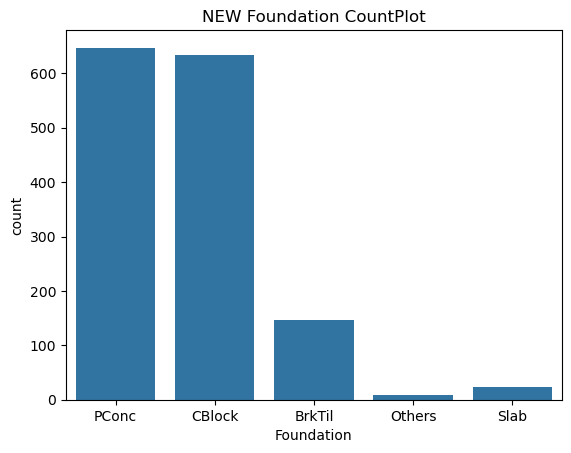

In [1769]:
sns.countplot(x='Foundation', data = data)
plt.title("NEW Foundation CountPlot")
plt.show()

##  Fireplaces 
**1. Null/Missing Values:** 0 missing values

No replacement needed! 

**2. Original Data Type:** Integer

- Change the datatype to categorical due to the low number of unique values.

**3. Number of Uniques:** 4 unique values.

**4. Data distribution:**: Most of the occurences appear to be in the 0 or 1 categories.

**5. Descriptive Variables:** The 2 & 3 categories are underepresented. To handle this, I will group these into a new category called "2 or more."
AFTER CHANGING TO CATEGORICAL
0    690
1    650
2    115
3      5

4


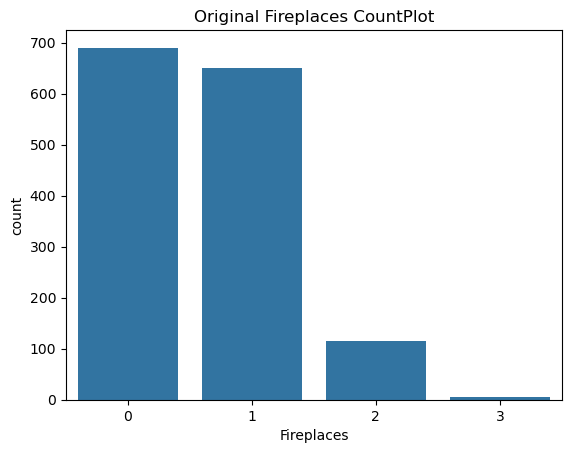

In [1771]:
#1
data.Fireplaces.isna().sum()
#3
data.Fireplaces.unique()
print(len(data.Fireplaces.unique()))
#4
sns.countplot(x='Fireplaces', data = data)
plt.title("Original Fireplaces CountPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is originally an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.

In [1773]:
data.Fireplaces.agg(['min','max','mean','std','median'])

min       0.000000
max       3.000000
mean      0.613014
std       0.644666
median    1.000000
Name: Fireplaces, dtype: float64

## Change datatype to categorical.

In [1775]:
data.Fireplaces = data.Fireplaces.astype('str')

## Analyze descriptive statistics (as Categorical)
Since this column is now a categorical variable, we will explore the proportion of the values using value_counts().

In [1777]:
data.Fireplaces.value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

## Handle underepresented categories by grouping into new category called "2 or more".

In [1779]:
data.loc[(data.Fireplaces=="2") | (data.Fireplaces =="3"), "Fireplaces"] = "2 or more"
data.Fireplaces.value_counts()

Fireplaces
0            690
1            650
2 or more    120
Name: count, dtype: int64

## NEW Countplot after cleaning.

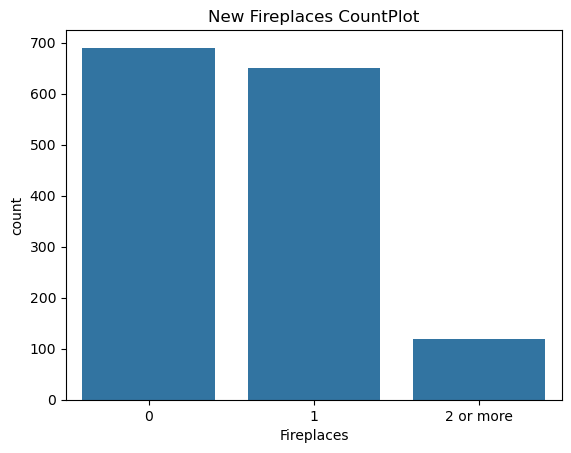

In [1781]:
sns.countplot(x='Fireplaces', data = data)
plt.title("New Fireplaces CountPlot")
plt.show()

## FireplaceQu
**1. Null/Missing Values:** 690 missing values

Replacement needed! Since the FireplaceQu represents the quality of a fireplace, we can assume a missing value indicates that the property does not have a fireplace. Therefore, I handled these missing values by replacing them with the string "None."

**2. Original Data Type:** Object/Categorical

- The object/categorical datatype is appropriate due to the low number of unique values and their string datatype. No change needed.

**3. Number of Uniques:** 6 unique values.

**4. Data distribution:**: The majority of values are "Ta" and 'Gd' categories. 

**5. Descriptive Variables:**  The "Fa","Ex",and"Po" categories are underepresented and need to be handled before modeling can occur. To handle this, I will combine these categories into a new category level called "Others."

Gd    380
TA    313
Fa     33
Ex     24
Po     20

6


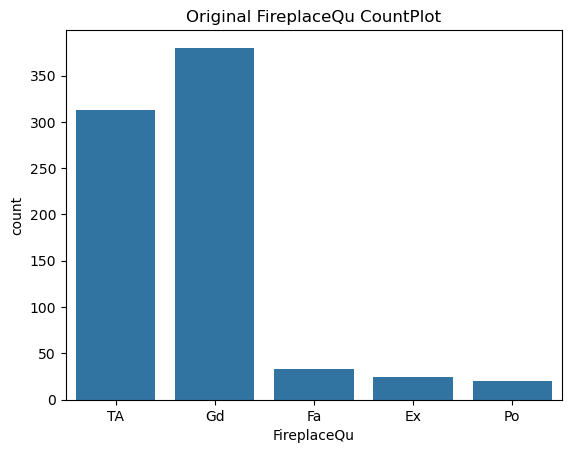

In [1783]:
#1
data.FireplaceQu.isna().sum()
#3
data.FireplaceQu.unique()
print(len(data.FireplaceQu.unique()))
#4
sns.countplot(x='FireplaceQu', data = data)
plt.title("Original FireplaceQu CountPlot")
plt.show()

In [1785]:
data.FireplaceQu.value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

## Replacement of missing values.
I cleaned the missing or null values by replacing them with the string "None".

In [1787]:
data.FireplaceQu.fillna("None", inplace = True)
data.FireplaceQu.isna().sum()

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3215626073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.FireplaceQu.fillna("None", inplace = True)


0

## Handle underepresented categories.

In [1789]:
data.loc[(data.FireplaceQu=="Ex") | (data.FireplaceQu =="Po") |(data.FireplaceQu =="Fa") , "FireplaceQu"] = "Others"
data.FireplaceQu.value_counts()

FireplaceQu
None      690
Gd        380
TA        313
Others     77
Name: count, dtype: int64

## New countplot after cleaning

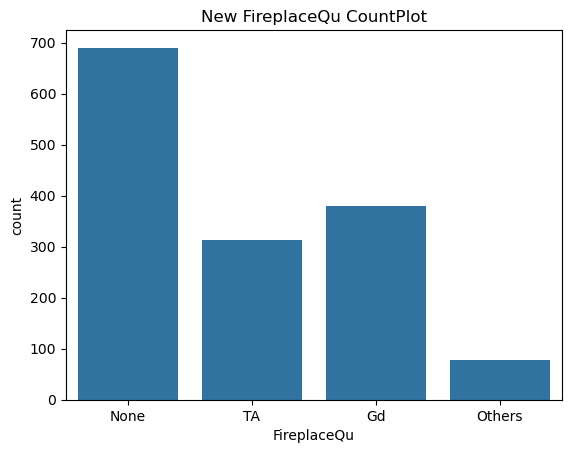

In [1791]:
sns.countplot(x='FireplaceQu', data = data)
plt.title("New FireplaceQu CountPlot")
plt.show()

## FullBath
**1. Null/Missing Values:** 0 missing values

No replacement needed!

**2. Original Data Type:** Integer

-  I changed this columns data type to string because there are only 4 unique values. This low number of unique values means that the column can be treated as a categorical variable.


**3. Number of Uniques:** 4 unique values.

**4. Data distribution:**: The majority of values are 1 and 2 categories. 

**5. Descriptive Variables:**  The 0 and 3 categories are underepresented and represent less than 2% of the entire dataset. Due to this signifigant level of underepresentation, I will be grouping them into a new "Other" category level.

2    768
1    650
3     33
0      9

In [1793]:
#1
data.FullBath.isna().sum()
#3
data.FullBath.unique()
print(len(data.FullBath.unique()))

4


## Analyze descriptive statistics BEFORE changing to categorical.

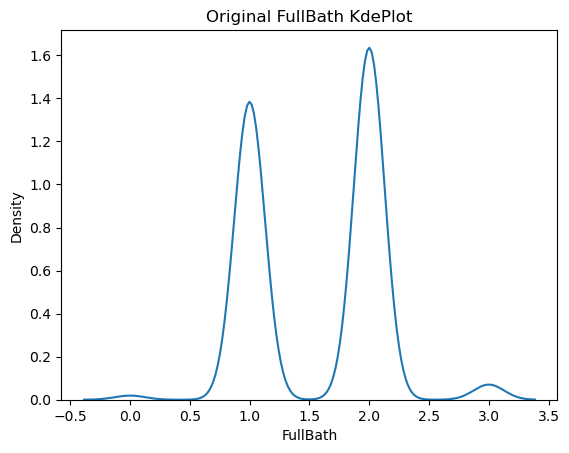

In [1795]:
sns.kdeplot(x='FullBath', data = data)
plt.title("Original FullBath KdePlot")
plt.show()

## Change to categorical variable.

In [1797]:
data.FullBath.astype(str)

0       2
1       2
2       2
3       1
4       2
5       1
6       2
7       2
8       2
9       1
10      1
11      3
12      1
13      2
14      1
15      1
16      1
17      2
18      1
19      1
20      3
21      1
22      2
23      1
24      1
25      2
26      1
27      2
28      1
29      1
30      1
31      1
32      2
33      1
34      2
35      3
36      1
37      1
38      1
39      2
40      2
41      1
42      1
43      1
44      1
45      2
46      1
47      2
48      2
49      1
50      2
51      1
52      1
53      0
54      1
55      2
56      2
57      2
58      3
59      1
60      1
61      1
62      2
63      2
64      2
65      2
66      2
67      2
68      1
69      2
70      2
71      1
72      2
73      1
74      2
75      1
76      1
77      1
78      2
79      1
80      2
81      2
82      2
83      1
84      2
85      2
86      2
87      2
88      1
89      1
90      1
91      1
92      1
93      2
94      2
95      2
96      2
97      1
98      1
99      1


## Observe data distribution AFTER changing to categorical.
Most of the occurences are in the 1 & 2 category levels.

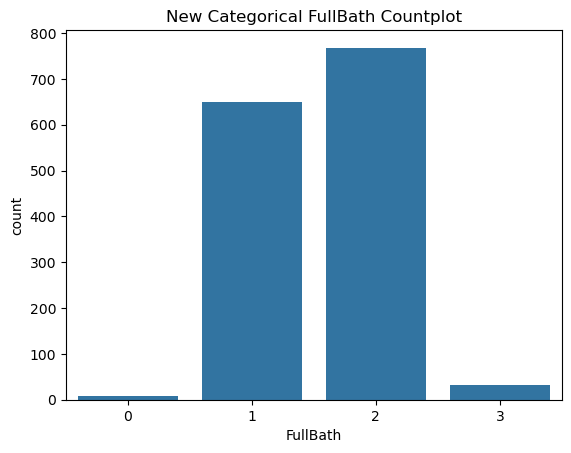

In [1799]:
sns.countplot(x='FullBath', data = data)
plt.title("New Categorical FullBath Countplot")
plt.show()

## Analyze descriptive statistics (as Categorical)
Since this column is now a categorical variable, we will explore the proportion of the values using value_counts().
Some underepresented categories exist & need to be handled.

In [1801]:
data.FullBath.value_counts()

FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64

## Handle underepresented categories.
Move all category levels with less than 34 occurences to a new level called 'Other'.

In [1803]:
fullbath_counts =data['FullBath'].value_counts()
fullbath_counts_less_than_34 =fullbath_counts[fullbath_counts<=34].index.tolist()
fullbath_counts_less_than_34
data['FullBath'] = \
data['FullBath'].apply(lambda x: 'Other' if x in fullbath_counts_less_than_34 else x)
data['FullBath'].value_counts()

FullBath
2        768
1        650
Other     42
Name: count, dtype: int64

## NEW FullBath Visualizations after Cleaning

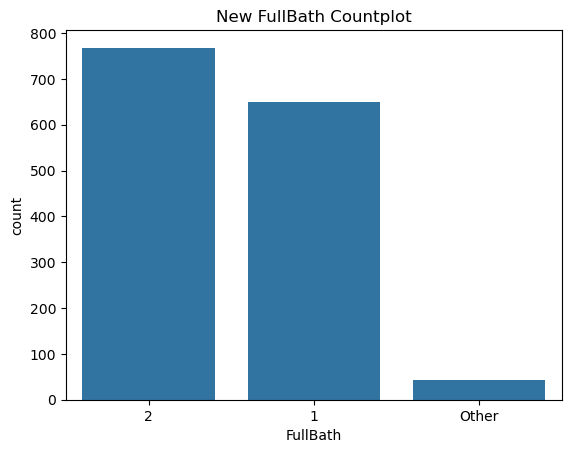

In [1805]:
sns.countplot(x='FullBath', data = data)
plt.title("New FullBath Countplot")
plt.show()

## HalfBath
**1. Null/Missing Values:** 0 missing values


**2. Original Data Type:** Integer

-  I changed this columns data type to string because there are only 4 unique values. This low number of unique values means that the column can be treated as a categorical variable.

**3. Number of Uniques:** 3 unique values.

**4. Data distribution:**: Most of the properties have 0 half bathes.

**5. Descriptive Variables:**  The 2 half-baths category is extremely underepresented and needs to be handled. To do so, I will replace 2 with a new "More than 1" category.

0    913
1    535
2     12

In [1807]:
#1
data.HalfBath.isna().sum()
#3
data.HalfBath.unique()
print(len(data.HalfBath.unique()))

3


## Analyze descriptive statistics (BEFORE changing to categorical)

In [1809]:
data.HalfBath.agg(['min','max','mean','median','std'])

min       0.000000
max       2.000000
mean      0.382877
median    0.000000
std       0.502885
Name: HalfBath, dtype: float64

## Change to categorical variable.

In [1811]:
data.HalfBath.astype(str)

0       1
1       0
2       1
3       0
4       1
5       1
6       0
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      1
32      0
33      1
34      0
35      1
36      1
37      0
38      0
39      0
40      0
41      1
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      0
55      0
56      1
57      1
58      1
59      0
60      1
61      0
62      0
63      0
64      1
65      1
66      0
67      0
68      0
69      0
70      0
71      0
72      1
73      0
74      0
75      0
76      0
77      0
78      0
79      1
80      1
81      0
82      0
83      1
84      1
85      1
86      1
87      1
88      0
89      0
90      0
91      0
92      0
93      0
94      1
95      1
96      0
97      0
98      0
99      1


## Observe data distribution AFTER changing to categorical.
Most of the occurences are in the 1 & 2 category levels.

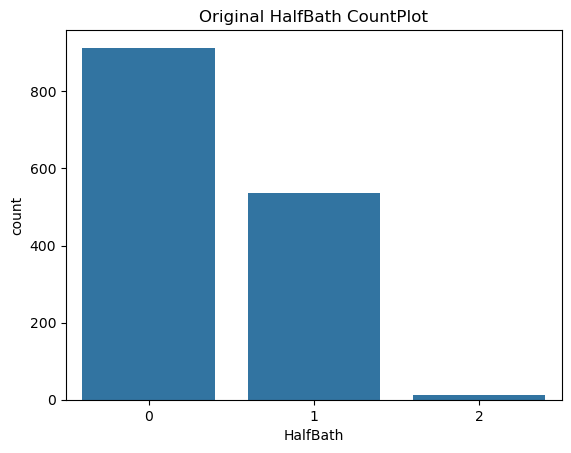

In [1813]:
sns.countplot(x='HalfBath', data = data)
plt.title("Original HalfBath CountPlot")
plt.show()

## Analyze descriptive statistics (as Categorical)
Since this column is now a categorical variable, we will explore the proportion of the values using value_counts().
Some underepresented categories exist & need to be handled.

In [1815]:
data.HalfBath.value_counts()

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

## Handle category underepresentation
Move all category levels with less than 13 occurences to a new level called 'Other'.

In [1817]:
halfbath_counts =data['HalfBath'].value_counts()
halfbath_counts_less_than_13 =halfbath_counts[halfbath_counts<=13].index.tolist()
halfbath_counts_less_than_13
data['HalfBath'] = \
data['HalfBath'].apply(lambda x: 'Other' if x in halfbath_counts_less_than_13 else x)
data['HalfBath'].value_counts()

HalfBath
0        913
1        535
Other     12
Name: count, dtype: int64

## NEW HalfBath Visualization after Cleaning

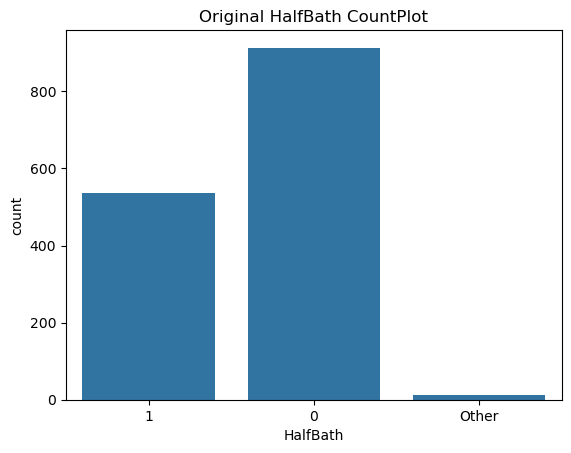

In [1819]:
#4
sns.countplot(x='HalfBath', data = data)
plt.title("Original HalfBath CountPlot")
plt.show()

## GarageCars
**1. Null/Missing Values:** 0 missing values

No replacement needed.

**2. Original Data Type:** Integer

- While this column has a low number of unique values, we may still want to perform mathematical calculations on this column, so I left it as an integer column.

**3. Number of Uniques:** 5 unique values.

**4. Data distribution:** Mostly normally distributed. No transformation needed.

**5. Descriptive Variables:**  The max and mins in combniation with the central tendency measurements indicate there are no outliers in this data distribution, so no transformations or handling of outliers are needed.

min       0.000000
max       4.000000
mean      1.767123
median    2.000000
std       0.747315

In [1821]:
#1
data.GarageCars.isna().sum()
#3
data.GarageCars.unique()
print(len(data.GarageCars.unique()))

5


## Data Distribution
Distribution appears to be mostly normally distrbuted.

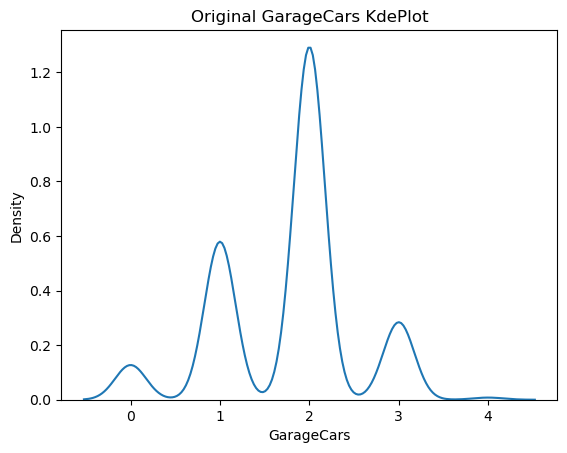

In [1823]:
sns.kdeplot(x='GarageCars', data = data)
plt.title("Original GarageCars KdePlot")
plt.show()

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.
No major outliers appear to exist.

In [1825]:
data.GarageCars.agg(['min','max','mean','median','std'])

min       0.000000
max       4.000000
mean      1.767123
median    2.000000
std       0.747315
Name: GarageCars, dtype: float64

## GarageType
**1. Null/Missing Values:** 81 missing values

- Replacement needed! We can infer that a missing value indicates the property does not have a Garage, so I will replace missing values with the string "NoGarage".

**2. Original Data Type:** Object/Categorical

- No change needed to this columns datatype.
- 
**3. Number of Uniques:** 7 unique values.

**4. Data distribution:**: Most of the properties have a GarageType of Attachd or Detchd. 

**5. Descriptive Variables:**  The CarPort, Basment, and 2Types categories are underepresented and need to be handled. To do this, I will group these levels into a new category called "Others."

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6

In [1827]:
#1
data.GarageType.isna().sum()
#3
data.GarageType.unique()
print(len(data.GarageType.unique()))

7


## Data Distribution
Majority of occurences appear to be in the Attch and Detchd levels.

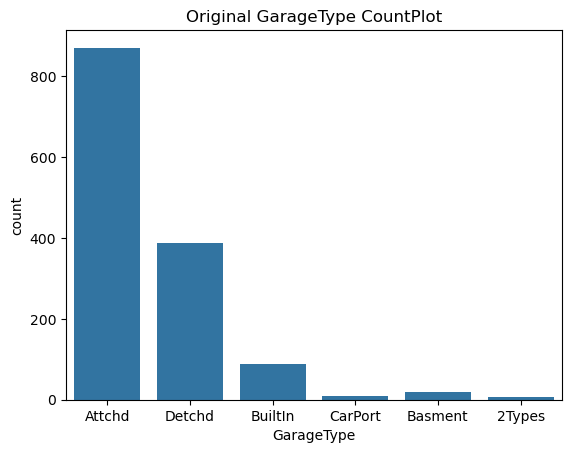

In [1829]:
sns.countplot(x='GarageType', data = data)
plt.title("Original GarageType CountPlot")
plt.show()

## Analyze descriptive statistics (as Categorical)
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().
Some underepresented categories exist & need to be handled.

In [1831]:
data.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

## Handle missing values.
Replace na's with the string "NoGarage."

In [1833]:
data.GarageType.fillna("NoGarage", inplace = True)
data.GarageType.isna().sum()

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/2815619206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GarageType.fillna("NoGarage", inplace = True)


0

## Handle underepresented categories.
Group the underepresented levels into a new level called "Other".

In [1835]:
data.loc[(data.GarageType == "2Types") | (data.GarageType == "CarPort") | (data.GarageType == "Basment"), "GarageType"] = "Other"
data.GarageType.value_counts()

GarageType
Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Other        34
Name: count, dtype: int64

## NEW Data Distribution Univariate Visualization 

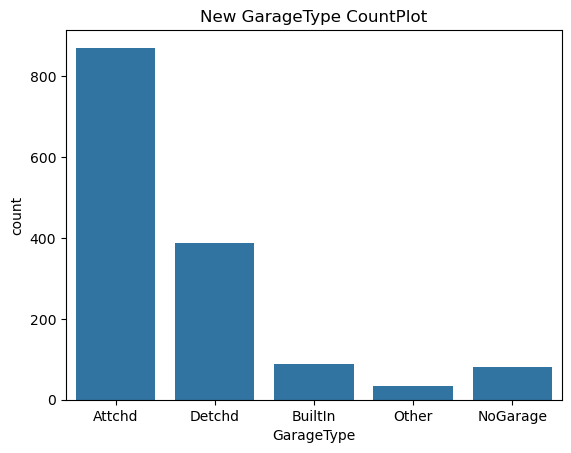

In [1837]:
sns.countplot(x='GarageType', data = data)
plt.title("New GarageType CountPlot")
plt.show()

## GarageYrBlt
**1. Null/Missing Values:** 81 missing values

- Replacement needed! We can infer that a missing value indicates the property does not have a Garage, so I will replace missing values with "0".

**2. Original Data Type:** Float

- After replacing missing values, I changed this column to integer datatype.

**3. Number of Uniques:** 98 unique values, no formatting consistency issues.

**4. Data distribution:**: Left skewed data distribution. Most garages were built more recently, in the 2000s. 

- Handle the left skewness of the data distribution, which may effect any linear regressions we may want to perform, by creating a NEW column called "GarageAge". This new column will be calculated by doing YrSold - GarageYrBuilt and could help reduce the skewness.

**5. Descriptive Variables:** From the descriptive statistics, we can determine that no outlying values exist and that most garages were built around the 1980s.

min       1900.000000
max       2010.000000
mean      1978.506164
median    1980.000000
std         24.689725

In [1839]:
#1
data.GarageYrBlt.isna().sum()
#3
data.GarageYrBlt.unique()
print(len(data.GarageYrBlt.unique()))

98


## Data Distribution
The data's distribution appears to be slightly left-skewed and needs to be handled.

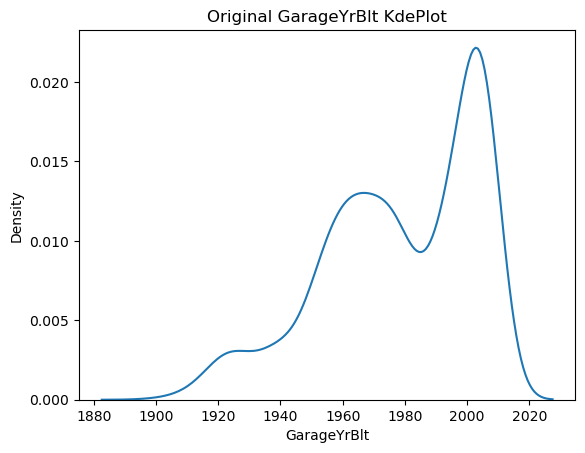

In [1841]:
#4
sns.kdeplot(x='GarageYrBlt', data = data)
plt.title("Original GarageYrBlt KdePlot")
plt.show()

## Data Distribution - BoxPlot to Visualize Outliers
No major outliers apppear to exist.

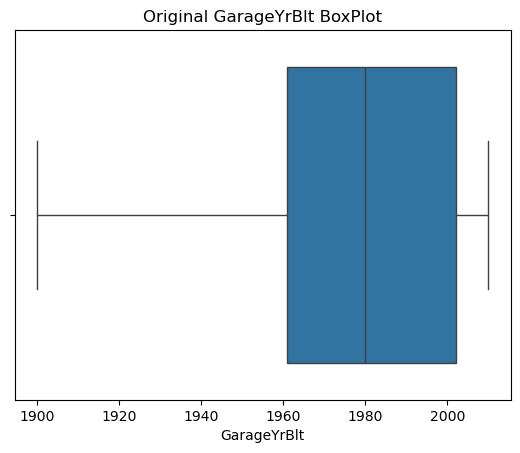

In [1843]:
sns.boxplot(x='GarageYrBlt', data = data)
plt.title("Original GarageYrBlt BoxPlot")
plt.show()

## Analyze descriptive statistics.
Since this column is has an integer datatype, we will explore the summary statistics such as mean, min, max, median, and std to futher understand the distribution of the data.
No major outliers appear to exist.

In [1845]:
data.GarageYrBlt.agg(['min','max','mean','median','std'])

min       1900.000000
max       2010.000000
mean      1978.506164
median    1980.000000
std         24.689725
Name: GarageYrBlt, dtype: float64

## Handle missing values.
Replace na's with the string "0"

In [1847]:
data.GarageYrBlt.fillna("0", inplace = True)
data.GarageYrBlt.isna().sum()

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3706947795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GarageYrBlt.fillna("0", inplace = True)
/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3706947795.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.GarageYrBlt.fillna("0", inplace = True)


0

## Change to integer datatype instead of float.

In [1849]:
data.GarageYrBlt = data.GarageYrBlt.astype(int)

## Create new column to generate better insights.
Create new column "GarageAge." By observing the age of the garage, we are better able to analyze how properties with older or newer garage's impact the SalePrice.

In [1851]:
data["GarageAge"] = data['YrSold'] - data['GarageYrBlt']

## Data Distribution of new column, **GarageAge**

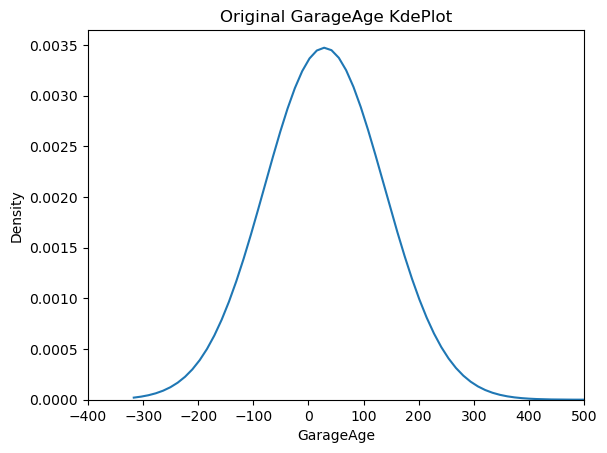

In [1853]:
sns.kdeplot(x='GarageAge', data = data)
plt.title("Original GarageAge KdePlot")
plt.xlim(-400, 500)
plt.show()

## GarageFinish
**1. Null/Missing Values:** 81 missing values

- Replacement needed! To replace these missing values, we can assume a NA value indicates the property does not have a garage. I will replace NA's with the string "NoGarage".
- 
**2. Original Data Type:** Object/Categorical

-  I changed this columns data type to string because there are only 4 unique values. This low number of unique values means that the column can be treated as a categorical variable.

**3. Number of Uniques:** 4 unique values.

**4. Data distribution:**: Most of the properties are in 'Unf' category. 

**5. Descriptive Variables:** No underepresented categories.

Unf    605
RFn    422
Fin    352

In [1855]:
#1
data.GarageFinish.isna().sum()
#3
data.GarageFinish.unique()
print(len(data.GarageFinish.unique()))

4


## Data Distribution
The data seems to have an almost - even distribution across all levels.

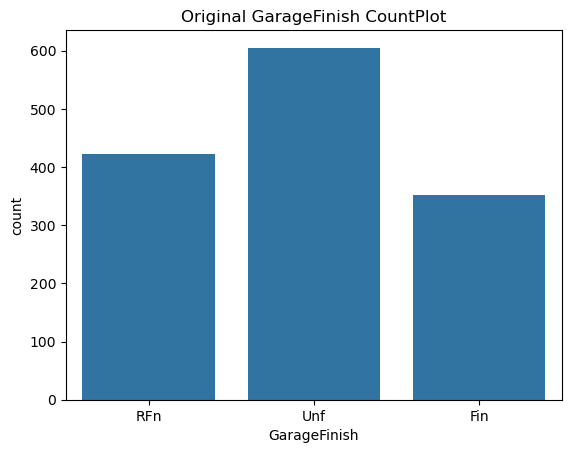

In [1857]:
sns.countplot(x='GarageFinish', data = data)
plt.title("Original GarageFinish CountPlot")
plt.show()

## Analyze descriptive statistics (as Categorical)
Since this column is a categorical variable, we will explore the proportion of the values using value_counts().
Some underepresented categories exist & need to be handled.

In [1859]:
data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

## Handle missing values.

In [1861]:
data.GarageFinish.fillna("NoGarage", inplace = True)
data.GarageFinish.isna().sum()

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/2171942723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GarageFinish.fillna("NoGarage", inplace = True)


0

## New GarageFinish Visualization after Cleaning

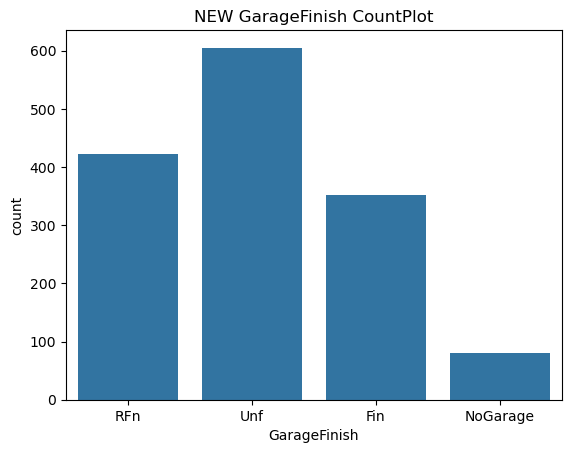

In [1863]:
sns.countplot(x='GarageFinish', data = data)
plt.title("NEW GarageFinish CountPlot")
plt.show()

## GarageArea
**1. Null/Missing Values:** 0 missing values


**2. Original Data Type:** Integer

- The integer data type in this case is approprate due to the high number of unique values. This is a column we would want to perform mathematical calcultions on, so the integer data type is needed.

**3. Number of Uniques:** 441 unique values.

**4. Data distribution:**: The data distribution is slightly right skewed and needs to be handled. 

**5. Descriptive Variables:**  The max is siginifigantly distances from the mean of the data, indicating that outliers exist. Due to the right skew of the data distribution, I will handle this by replacing outliers using the IQR Median Replacement method.

mean       472.980137
min          0.000000
max       1418.000000
median     480.000000
std        213.804841

In [1865]:
#1
data.GarageArea.isna().sum()
#3
data.GarageArea.unique()
print(len(data.GarageArea.unique()))

441


## Data Distribution
Mostly normally distributed - no cleaning needed.

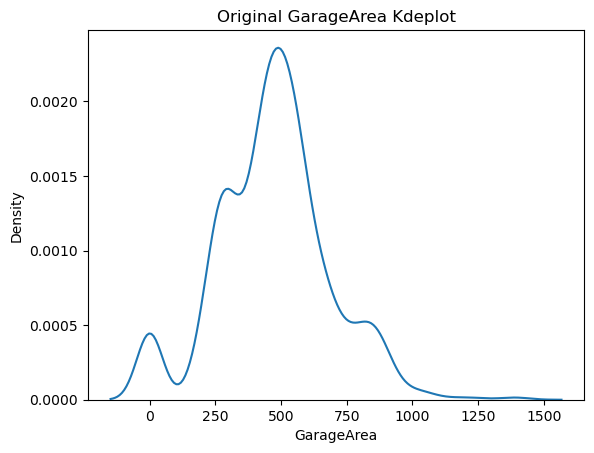

In [1867]:
sns.kdeplot(x='GarageArea', data = data)
plt.title("Original GarageArea Kdeplot")
plt.show()

## GarageArea Boxplot - Identify Outliers Existence
Outliers exist! Mostly above the upper fence.

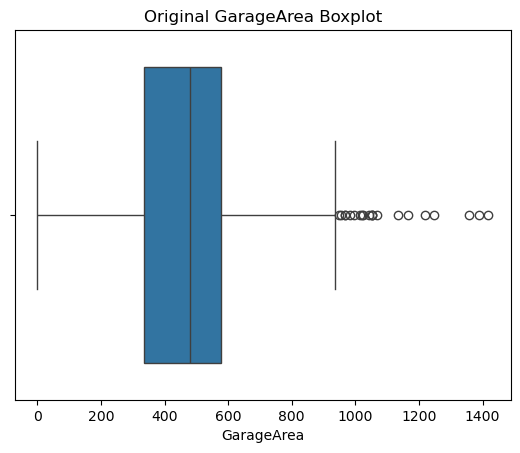

In [1869]:
sns.boxplot(x='GarageArea', data = data)
plt.title("Original GarageArea Boxplot")
plt.show()

## Analyze summary statistics 
... and determine if outliers exist.

In [1871]:
data.GarageArea.agg(['mean','min','max','median','std'])

mean       472.980137
min          0.000000
max       1418.000000
median     480.000000
std        213.804841
Name: GarageArea, dtype: float64

## Handle outliers - using IQR median replacement method
Identify upper, lower fences and min and max values.

In [1873]:
Q1 = data.GarageArea.quantile(q = .25)
Q3 = data.GarageArea.quantile(q = .75)
IQ = Q3 - Q1
Lower_Fence_IQR = Q1 - 1.5*IQ
Upper_Fence_IQR = Q3 + 1.5*IQ
print("Median      " + str(data.GarageArea.median()))
print("Lower Fence " + str(Lower_Fence_IQR))
print("Upper Fence " + str(Upper_Fence_IQR))
print("Min         " + str(data.GarageArea.min()))
print("Max         " + str(data.GarageArea.max()))

Median      480.0
Lower Fence -27.75
Upper Fence 938.25
Min         0
Max         1418


## Handle outliers - using IQR median replacement method
Replace values above and below fences with the median of the data.

In [1875]:
data["GarageArea_medianrep_IQR"] = data.GarageArea
data.loc[data.GarageArea_medianrep_IQR < Lower_Fence_IQR, "GarageArea_medianrep_IQR"] = median
data.loc[data.GarageArea_medianrep_IQR > Upper_Fence_IQR, "GarageArea_medianrep_IQR"] = median

data.GarageArea = data.GarageArea_medianrep_IQR

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/1005675758.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.248495242049359' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.GarageArea_medianrep_IQR < Lower_Fence_IQR, "GarageArea_medianrep_IQR"] = median


## New Visualizations after Cleaning

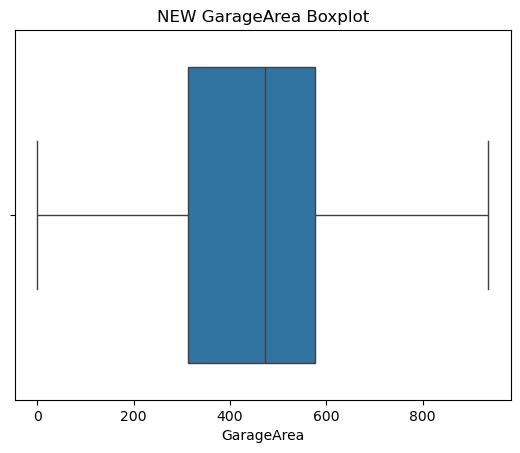

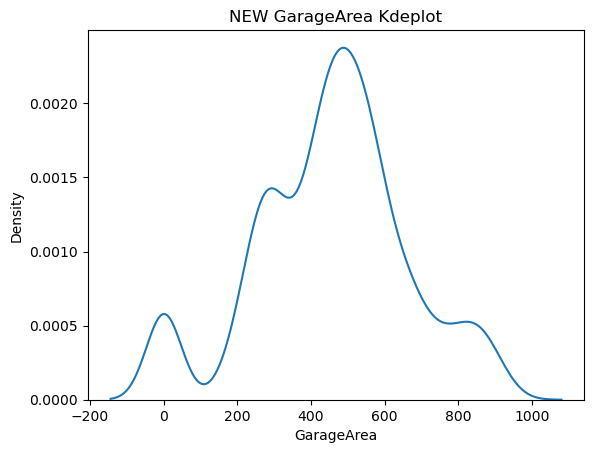

In [1877]:
sns.boxplot(x='GarageArea', data = data)
plt.title("NEW GarageArea Boxplot")
plt.show()
sns.kdeplot(x='GarageArea', data = data)
plt.title("NEW GarageArea Kdeplot")
plt.show()

## GarageQual
**1. Null/Missing Values:** 81 missing values

- Replacement needed! To replace these missing values, we can assume a NA value indicates the property does not have a garage. I will replace NA's with the string "NoGarage".
- 
**2. Original Data Type:** Object/Categorical


**3. Number of Uniques:** 6 unique values.

**4. Data distribution:**: A siginifigant portion of the data is in the "TA" category. 

**5. Descriptive Variables:**  Similar to the FireplaceQu column, the "Po" and "Ex" category levels are underepresented in the column and need to be handled. To do this, I will replace these categories with a new "Others" category level.

TA    1311
Fa      48
Gd      14
Ex       3
Po       3

In [1879]:
#1
data.GarageQual.isna().sum()
#3
data.GarageQual.unique()
print(len(data.GarageQual.unique()))


6


## Data Distribution
Most of the occurences are in the "TA" category level.

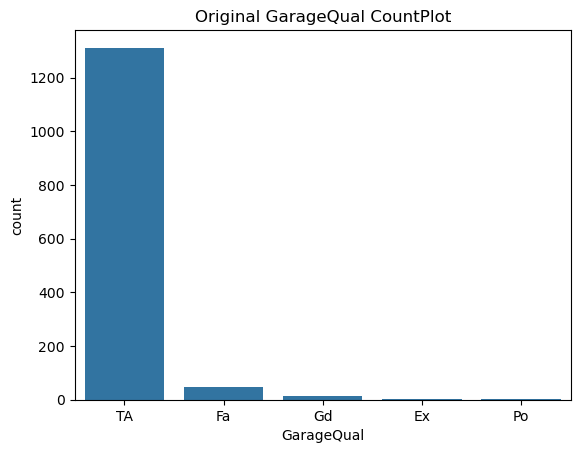

In [1881]:
sns.countplot(x='GarageQual', data = data)
plt.title("Original GarageQual CountPlot")
plt.show()

## Analyze descriptive statistics.
Since the column is categorical, we will observe the value counts/proportion of each categorical level.

In [1883]:
data.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

## Handle missing values.

data.GarageQual.fillna("NoGarage", inplace = True)
data.GarageQual.isna().sum()

## Handle underepresented categories.
Replace underepresented with new "Others" category level.

In [1887]:
data.loc[(data.GarageQual=="Ex") | (data.GarageQual =="Po") , "GarageQual"] = "Others"
data.GarageQual.value_counts()

GarageQual
TA        1311
Fa          48
Gd          14
Others       6
Name: count, dtype: int64

## NEW GarageQual Visualizations after Cleaning

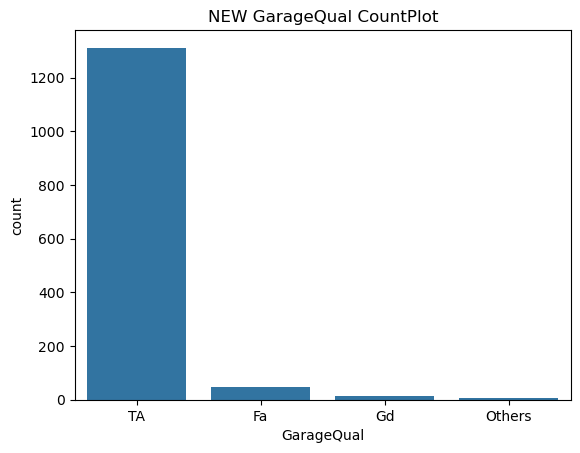

In [1889]:
sns.countplot(x='GarageQual', data = data)
plt.title("NEW GarageQual CountPlot")
plt.show()

## GarageCond
**1. Null/Missing Values:** 81 missing values

- Replacement needed! To replace these missing values, we can assume a NA value indicates the property does not have a garage. I will replace NA's with the string "NoGarage".

  
**2. Original Data Type:** Object/Categorical


**3. Number of Uniques:** 6 unique values.

**4. Data distribution:**: A siginifigant portion of the data is in the "TA" category. 

**5. Descriptive Variables:**  Similar to the FireplaceQu column, the "Gd","Po", and "Ex" category levels are underepresented in the column and need to be handled. To do this, I will replace these categories with a new "Others" category level.

TA    1326
Fa      35
Gd       9
Po       7
Ex       2

In [1891]:
#1
data.GarageCond.isna().sum()
#3
data.GarageCond.unique()
print(len(data.GarageCond.unique()))

6


## Data Distribution
Most of the occurences are in the "TA" category level.

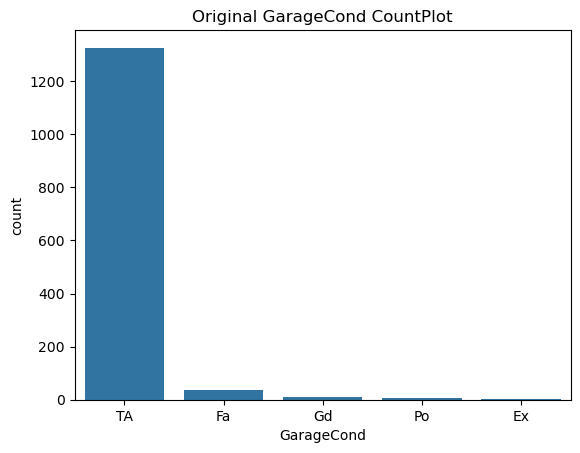

In [1893]:
sns.countplot(x='GarageCond', data = data)
plt.title("Original GarageCond CountPlot")
plt.show()

## Analyze descriptive statistics.
Since the column is categorical, we will observe the value counts/proportion of each categorical level.

In [1895]:
data.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

## Handle missing values

In [1897]:
data.GarageCond.fillna("NoGarage", inplace = True)
data.GarageCond.isna().sum()

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/4228793670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.GarageCond.fillna("NoGarage", inplace = True)


0

## Handle underepresented categories.
Replace underepresented with new "Others" category level.

In [1899]:
data.loc[(data.GarageCond=="Ex") | (data.GarageCond =="Po") |(data.GarageCond =="Gd") , "GarageCond"] = "Others"
data.GarageCond.value_counts()

GarageCond
TA          1326
NoGarage      81
Fa            35
Others        18
Name: count, dtype: int64

## NEW GarageCond Visualization after Cleaning

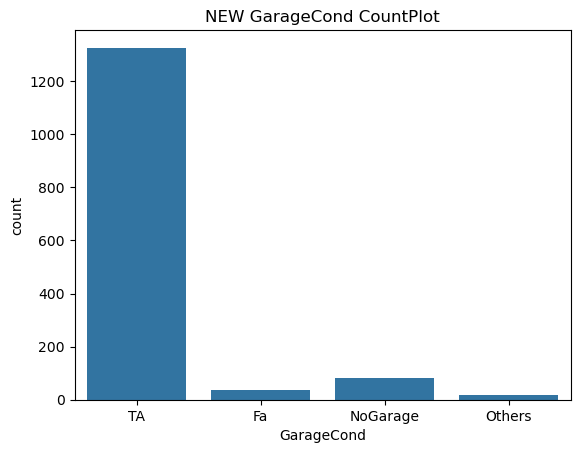

In [1901]:
sns.countplot(x='GarageCond', data = data)
plt.title("NEW GarageCond CountPlot")
plt.show()

## PavedDrive
**1. Null/Missing Values:** 0 missing values


**2. Original Data Type:** Object/Categorical


**3. Number of Uniques:** 3 unique values. (Y/N/P)

**4. Data distribution:**: Most of the properties have 'Y', meaning the property has a paved drive.

**5. Descriptive Statistics:**  There are no underepresented categories. 
Y    1340
N      90
P      30

In [1903]:
#1
data.PavedDrive.isna().sum()
#3
data.PavedDrive.unique()
print(len(data.PavedDrive.unique()))

3


## Data Distribution

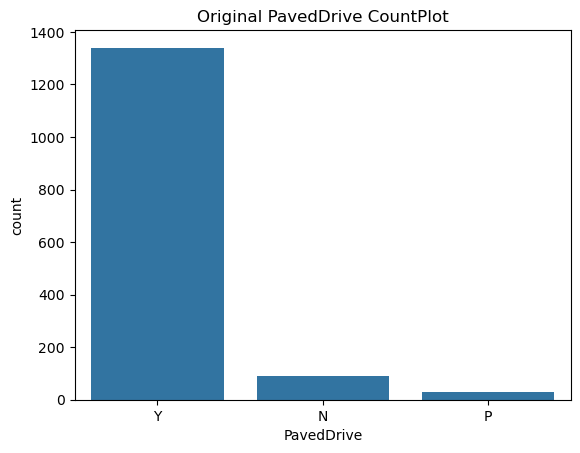

In [1905]:
sns.countplot(x='PavedDrive', data = data)
plt.title("Original PavedDrive CountPlot")
plt.show()

## Analyze descriptive statistics.
Since the column is categorical, we will observe the value counts/proportion of each categorical level.
No underepresented categories were found.

In [1907]:
data.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

## BedroomAbvGr
**1. Null/Missing Values:** 0 missing values


**2. Original Data Type:** Integer

- Change this column to categorical variable due to the low number of unique values.


**3. Number of Uniques:** 8 unique values. 

**4. Data distribution:**: The distribution of the data is not totally distributed. Outliers seem to exist past both fences. However, this will not matter once we change the column to a categorical variable. After changing to a categorical variable, we can see that the majority of occurences are in the '3' category.


**5. Descriptive Statistics:**  There are underepresented category levels in this column, including the 6, 0, and 8 category levels, all which have less than 10 occurences and need to be cleaned. To clean this column, I will combine these category levels into a new level called "Others."

BEFORE CHANGING TO CATEGORICAL
min       0.000000
max       8.000000
mean      2.866438
median    3.000000
std       0.815778

AFTER CHANGING TO CATGORICAL.
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1

In [1909]:
#1
data.BedroomAbvGr.isna().sum()
#3
data.BedroomAbvGr.unique()
print(len(data.BedroomAbvGr.unique()))

8


## Data Distribution (as Integer)
Before changing to categorical.

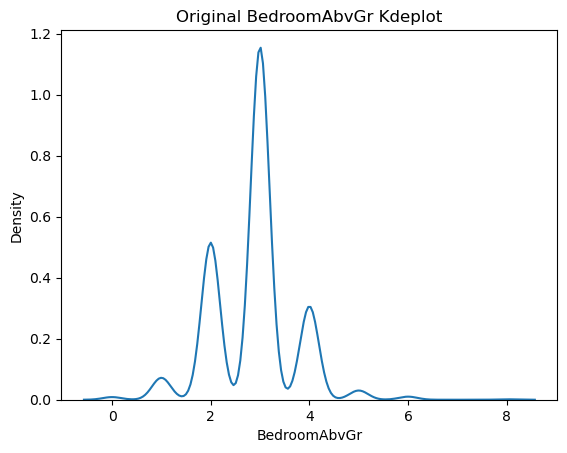

In [1911]:
sns.kdeplot(x='BedroomAbvGr', data = data)
plt.title("Original BedroomAbvGr Kdeplot")
plt.show()

## Check for outliers
By observing the boxplot, we can see that outliers exist outside of both the upper and lower fences.

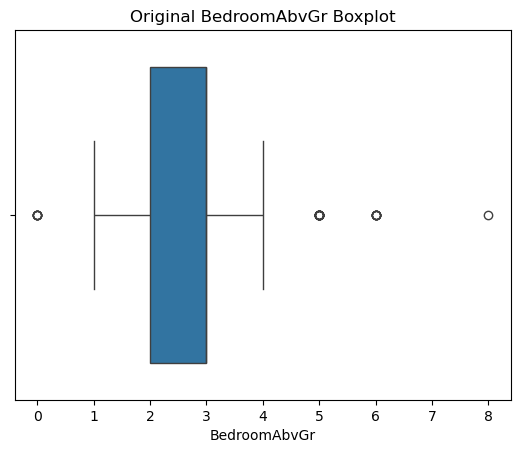

In [1913]:
sns.boxplot(x='BedroomAbvGr', data = data)
plt.title("Original BedroomAbvGr Boxplot")
plt.show()

## Analyze descriptive statistics. 
(As an integer first)

In [1915]:
data.BedroomAbvGr.agg(['min','max','mean','median','std'])

min       0.000000
max       8.000000
mean      2.866438
median    3.000000
std       0.815778
Name: BedroomAbvGr, dtype: float64

## Change variable to categorical type

In [1917]:
data.BedroomAbvGr = data.BedroomAbvGr.astype('str')

## Data Distribution (as Categorical)
Most of the observations are in the 3 and 2 category levels.

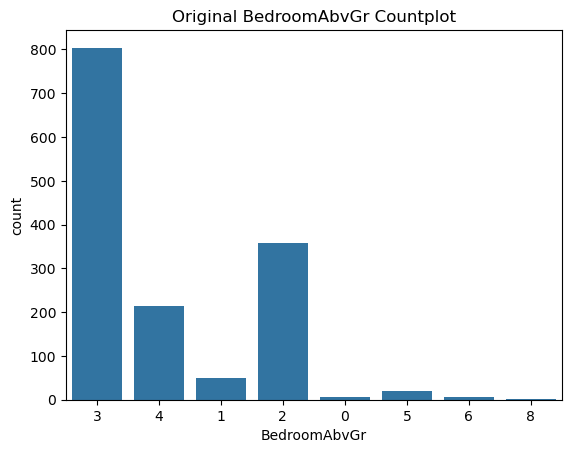

In [1919]:
sns.countplot(x='BedroomAbvGr', data = data)
plt.title("Original BedroomAbvGr Countplot")
plt.show()

## Analyze descriptive statistics. (as Categorical)

In [1921]:
data.BedroomAbvGr.value_counts()

BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64

## Handle underepresented categories.
Move category levels with less than 10 occurences into new "Others" category.

In [1923]:
bedroomabvgr_counts =data['BedroomAbvGr'].value_counts()
bedroomabvgr_counts_less_than_10 =bedroomabvgr_counts[bedroomabvgr_counts<=10].index.tolist()
bedroomabvgr_counts_less_than_10
data['BedroomAbvGr'] = \
data['BedroomAbvGr'].apply(lambda x: 'Others' if x in bedroomabvgr_counts_less_than_10 else x)
data['BedroomAbvGr'].value_counts()

BedroomAbvGr
3         804
2         358
4         213
1          50
5          21
Others     14
Name: count, dtype: int64

## NEW Visualization after Cleaning

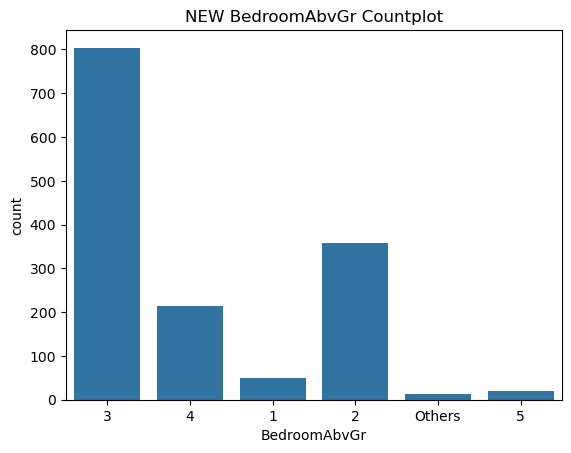

In [1925]:
sns.countplot(x='BedroomAbvGr', data = data)
plt.title("NEW BedroomAbvGr Countplot")
plt.show()

## SalePrice
**1. Null/Missing Values:** 0 missing values


**2. Original Data Type:** Integer

**3. Number of Uniques:** 663 unique values. 

**4. Data distribution:**: The distribution of the data is right skewed. To handle this, I will perform a non-linear transformation of log10 on the column.


**5. Descriptive Statistics:**  The summary stats seem to indicate that outliers exist.

In [1927]:
#1
data.SalePrice.isna().sum()
#3
data.SalePrice.unique()
print(len(data.SalePrice.unique()))

663


## Data Distribution
SalePrice is right skewed & needs to be handled.

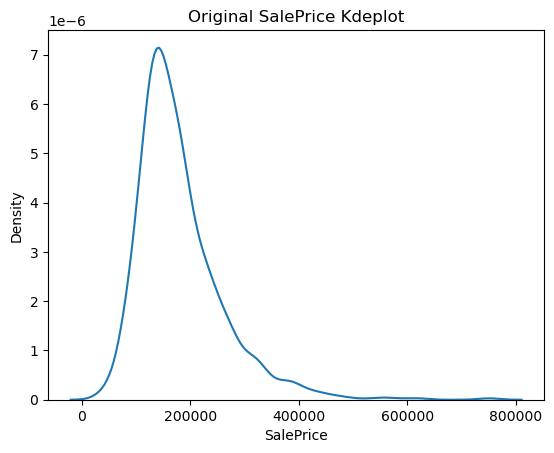

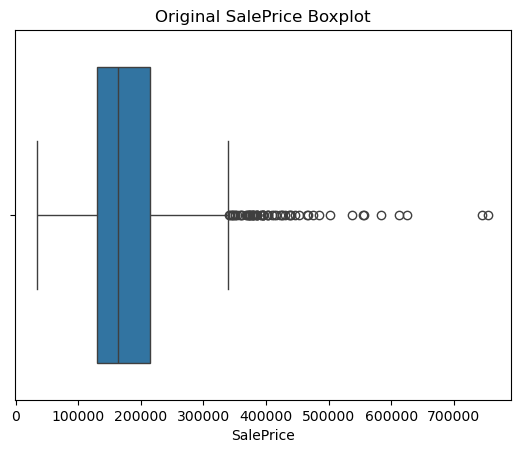

In [1929]:
sns.kdeplot(x='SalePrice', data = data)
plt.title("Original SalePrice Kdeplot")
plt.show()
sns.boxplot(x='SalePrice', data = data)
plt.title("Original SalePrice Boxplot")
plt.show()

## Analyze descriptive statistics. 

In [1931]:
data.SalePrice.agg(['min','max','mean','median','std'])

min        34900.000000
max       755000.000000
mean      180921.195890
median    163000.000000
std        79442.502883
Name: SalePrice, dtype: float64

## Handle SalePrice skewness.

In [1933]:
data['SalePrice_log10'] = np.log10(data.SalePrice)
data.SalePrice = data.SalePrice_log10

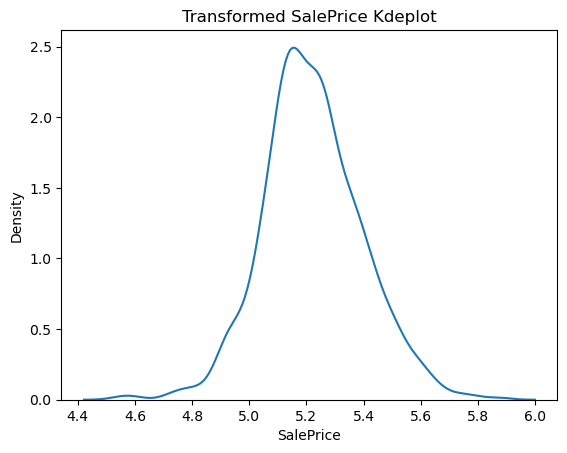

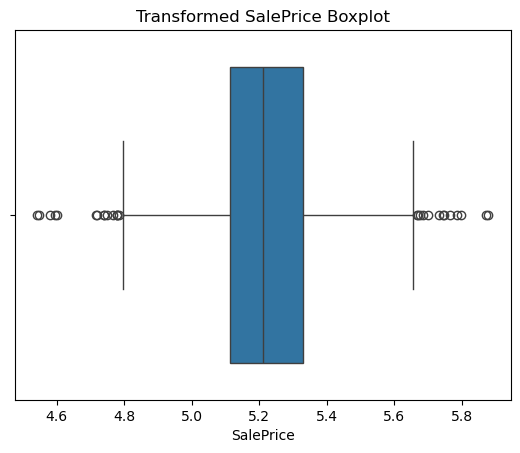

In [1934]:
sns.kdeplot(x='SalePrice', data = data)
plt.title("Transformed SalePrice Kdeplot")
plt.show()
sns.boxplot(x='SalePrice', data = data)
plt.title("Transformed SalePrice Boxplot")
plt.show()

## Outliers still exist, handle them
To handle remanining outliers, I will use the IQR mean replacement method.

In [1936]:
Q1 = data.SalePrice.quantile(q = .25)
Q3 = data.SalePrice.quantile(q = .75)
IQ = Q3 - Q1
Lower_Fence_IQR = Q1 - 1.5*IQ
Upper_Fence_IQR = Q3 + 1.5*IQ
print("Median      " + str(data.SalePrice.median()))
print("Lower Fence " + str(Lower_Fence_IQR))
print("Upper Fence " + str(Upper_Fence_IQR))
print("Min         " + str(data.SalePrice.min()))
print("Max         " + str(data.SalePrice.max()))

Median      5.212187604403958
Lower Fence 4.789028844972176
Upper Fence 5.655244730375401
Min         4.54282542695918
Max         5.8779469516291885


## Handle outliers, replace with mean using IQR

In [1938]:
mean = data.SalePrice.mean()
data["SalePrice_meanrep_IQR"] = data.SalePrice
data.loc[data.SalePrice_meanrep_IQR < Lower_Fence_IQR, "SalePrice_meanrep_IQR"] = mean
data.loc[data.SalePrice_meanrep_IQR > Upper_Fence_IQR, "SalePrice_meanrep_IQR"] = mean
data.SalePrice = data["SalePrice_meanrep_IQR"] 

## CHECK to ensure outliers have been removed

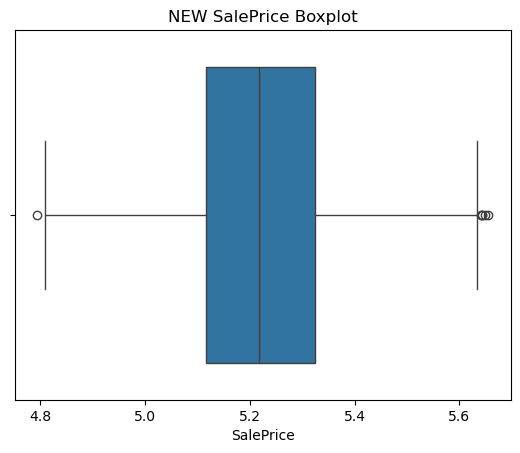

In [1940]:
sns.boxplot(x='SalePrice', data = data)
plt.title("NEW SalePrice Boxplot")
plt.show()

# Bivariate Exploration

## SalePrice & MSSubClass
Since both variables are integers, I'll visualize their relationship using a regplot & scatterplot.

TypeError: can't multiply sequence by non-int of type 'float'

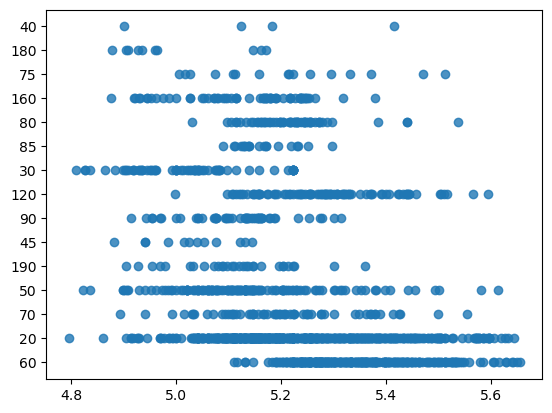

In [1943]:
sns.regplot(x='SalePrice', y = "MSSubClass", data = data)    
plt.show()                                             

## SalePrice & LotFrontage
Since both variables are integers, I'll visualize their relationship using a regplot & scatterplot.
A clear upward relationship can be seen in the regplot below - as LotFrontage increases, SalePrice increases. Due to the strength of this linear relationship, I would use this column as a predictor for SalePrice.

In [ ]:
sns.regplot(x='SalePrice', y = "LotFrontage", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='LotFrontage', data = data)
plt.show()     

## SalePrice & LotArea
Since both variables are integers, I'll visualize their relationship using a regplot & scatterplot.

A clear upward relationship can be seen in the regplot below - as LotArea increases, SalePrice increases. Due to the strength of this linear relationship, I would use this column as a predictor for SalePrice.

In [ ]:
sns.regplot(x='SalePrice', y = "LotArea", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='LotArea', data = data)
plt.show() 

## SalePrice & LotConfig
Due to SalePrice being numeric and LotConfig being a categorical variable, I'll visualize their relationship using a boxplot and heatplot.

## SalePrice & LotConfig
Frist, I'll need to one-hot encode the LotConfig column in order to calculate correlations & create the heatmap.

In [ ]:
data["LotConfig_Hot"] = data.LotConfig
data_corr = pd.get_dummies(data, columns = ["LotConfig_Hot"], dtype = int)

## SalePrice & LotConfig
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","LotConfig_Hot_Corner", "LotConfig_Hot_CulDSac", "LotConfig_Hot_FR2", "LotConfig_Hot_Inside"]]
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

### Heatmap Insights: 
By visualizing the correlations between SalePrice and each category of LotConfig, we can determine that the CulDSac has the highest correlation with SalePrice. CulDSac has the strongest correlation with SalePrice at a positive 0.13, while the remaining category levels have weaker negative correlations. This indicates that LotConfig may not be the best indicator of SalePrice due to the weakness of it's correlations.

## SalePrice & LotConfig
The boxplot shows that there is not a large difference in central tendency. However, CulDSac has the highest median, confirming that it has the highest correlation with SalePrice. Due to it's stronger positive correlation, it makes sense that CulDSac properties would have higher SalePrice values than other categories.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'LotConfig', data = data)
plt.show()

## SalePrice & Neighborhood
Due to SalePrice being numeric and Neighborhood being a categorical variable, I'll visualize their relationship using a heatmap & boxplot.

## SalePrice & Neighborhood
Frist, I'll need to one-hot encode the Neighborhood column in order to calculate correlations & create the heatmap.

In [ ]:
data["Neighborhood_Hot"] = data.Neighborhood
data_corr = pd.get_dummies(data, columns = ["Neighborhood_Hot"], dtype = int)

## SalePrice & Neighborhood
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "Neighborhood_Hot_NoRidge", "Neighborhood_Hot_NridgHt","Neighborhood_Hot_OldTown","Neighborhood_Hot_Others","Neighborhood_Hot_SWISU","Neighborhood_Hot_Sawyer","Neighborhood_Hot_SawyerW","Neighborhood_Hot_Somerst","Neighborhood_Hot_StoneBr","Neighborhood_Hot_Timber",]]
plt.figure(figsize=(20, 10))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

### Heatmap Insights: 
By visualizing the correlations between SalePrice and each category of Neighborhood, we can determine that the NridgHt Neighborhood has the highest correlation with SalePrice, with a positive correlation of 0.34. This is much stronger than previous variable's correlation, meaning that Neighborhood is likley a good indicator of SalePrice. 

There are neighborhoods with positive and with negative correlations. The neighborhoods with positive correlations with SalePrice include Nridght, StoneBr, NoRidge, Somerst, and Veenker. The neighborhoods with negative correlations with SalePrice include MeadowV, IDOTRR, and BrDale. Positively correlated neighborhoods will cause SalePrice to increase & negativeley correlated will do the opposite. 

Let's see how these correlations effect SalePrice values by looking at a boxplot of the column.

## SalePrice & Neighborhood
The boxplot shows that there are large differences in central tendency for each Neighborhood. 

More expensive (with higher SalePrice) neighborhoods include Nridght, StoneBr, NoRidge, Somerst, and Veenker. We know this because they have higher medians.

The less expensive (with lower SalePrice) neighborhoods include MeadowV, IDOTRR, and BrDale. We know this because they have lower medians.

During modeling, it may be helpful to continue to explore the Neighborhood's, grouping them into categories by less and more expensive, and trying to determine why these neighborhoods have higher prices.


In [ ]:
sns.boxplot(x = 'SalePrice', y = 'Neighborhood', data = data)
plt.show()

## SalePrice & OverallQual
Due to SalePrice being numeric and OverallQual being a categorical variable, I'll visualize their relationship using a heatmap and boxplot.

## SalePrice & OverallQual
Frist, I'll need to one-hot encode the OverallQual column in order to calculate correlations & create the heatmap.

In [ ]:
data["OverallQual_Hot"] = data.OverallQual
data_corr = pd.get_dummies(data, columns = ["OverallQual_Hot"], dtype = int)

## SalePrice & OverallQual
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "OverallQual_Hot_Less than 3", "OverallQual_Hot_3", "OverallQual_Hot_4", "OverallQual_Hot_5", "OverallQual_Hot_6","OverallQual_Hot_7","OverallQual_Hot_8","OverallQual_Hot_9","OverallQual_Hot_10"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The OverallQual level with the highest correlation to SalePrice is level 8.  It seems the 7-10 range has the strongest positive correlations across all category levels. Howeverm there are some stronger negatively correlated categories, inclduing 5, with a correlation of -0.41. Due to the stronger correlations, positive or negative, we can assume that OverallQual is a good indicator of SalePrice.

## SalePrice & OverallQual
Overall, the categories don't appear to have a signifigant amound of variance in their SalePrice values except for the 10 category. This is interesting as the correlation at 10 was the lowest of the positively correlated categories, with a correlation of only 0.13.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'OverallQual', data = data)
plt.show()

## SalePrice & Condition1
Due to SalePrice being numeric and Condition1 being a categorical variable, I'll visualize their relationship using a boxplot & heatmap

## SalePrice & Condition1
Frist, I'll need to one-hot encode the Condition1 column in order to calculate correlations & create the heatmap.

In [ ]:
data["Condition1_Hot"] = data.Condition1
data_corr = pd.get_dummies(data, columns = ["Condition1_Hot"], dtype = int)

## SalePrice & LotConfig
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","Condition1_Hot_Artery", "Condition1_Hot_Feedr","Condition1_Hot_Norm","Condition1_Hot_PosN",
"Condition1_Hot_RRAe","Condition1_Hot_RRAn"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
Overall, it seems that Condition1 has a higher correlation with SalePrice across all categories than previous variables. However, overall, the correlation is fairly weak. This indicates that Condition1 has very little impact on the SalePrice of properties and would not be a good indicator of SalePrice.

## SalePrice & Condition1
Overall, there are no MAJOR differences in central tendency for each level, although a small amount of variation between each category does exist. The RRNn level has the highest median SalePrice of all levels, indicating that properties with this tend to sell at more expensive prices.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'Condition1', data = data)
plt.show()

## SalePrice & Alley
Due to SalePrice being numeric and Alley being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & Alley 
Frist, I'll need to one-hot encode the Alley column in order to calculate correlations & create the heatmap.

In [ ]:
data["Alley_Hot"] = data.Alley
data_corr = pd.get_dummies(data, columns = ["Alley_Hot"], dtype = int)

## SalePrice & Alley
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","Alley_Hot_Grvl", "Alley_Hot_Pave","Alley_Hot_No Alley"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
It appears that having NoAlley associated with the property has the strongest positive impact on SalePrice with a correlation of 0.12. This makes sense as it would likely be more desireable for buyers for the home to not have an alleyway. However, having a Grvl alley type has the strongest impact on SalePrice value overall with a negative correlation of -0.16. Overall, the correlations with SalePrice are fairly weak and indicate that Alley would not be an ideal predictor for SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'Alley', data = data)
plt.show()

## SalePrice & Alley
There are differences in median for each category level. The Pave and Grvl types have lower measures of central tendency. This makes sense because we just observed their negative relationship with SalePrice, meaning these categories will have a lower SalePrice. Additionally, No Alley has the highest median of the categories, aligning with it's stronger positive correlation with SalePrice


## SalePrice & ExterQual
Due to SalePrice being numeric and ExterQual being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & ExterQual 
Frist, I'll need to one-hot encode the ExterQual column in order to calculate correlations & create the heatmap.

In [ ]:
data["ExterQual_Hot"] = data.ExterQual
data_corr = pd.get_dummies(data, columns = ["ExterQual_Hot"], dtype = int)

## SalePrice & Alley
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "ExterQual_Hot_Ex","ExterQual_Hot_Fa","ExterQual_Hot_Gd","ExterQual_Hot_TA"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
Various levels of ExterQual have different correlations with SalePrice. The Hot_Ex and Hot_Gd levels have fairly strong positive correlations. Hot_Gd has a much stronger correlation with SalePrice with a correlation of 0.54. In addition to these, it's important to note that Hot_TA and Hot_Fa have strong negative correlations with SalePrice. This means that properites with these characteristics will have a lower SalePrice overall.

**Due to the strength of ExterQual's correlations, we can assume that it is a good indicator of SalePrice.**

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'ExterQual', data = data)
plt.show()

## SalePrice & ExterQual
Between each category there is signifigant variation in each categories measure of central tendency. Our categories with positive correlations (Ex & Gd) have higher medians than our negatively correlated categories. 
Their boxes are also much shorter, indicating a less varied range of price and more consistent SalePrice values. 
This makes sense, as the Ex & Gd categories will have a positive, or upward, impact on SalePrice.

The Fa category level has the lowest median also seems to have less consistent SalePrice values than other categories.

## SalePrice & Foundation
Due to SalePrice being numeric and Foundation being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & Foundation 
Frist, I'll need to one-hot encode the Foundation column in order to calculate correlations & create the heatmap.

In [ ]:
data["Foundation_Hot"] = data.Foundation
data_corr = pd.get_dummies(data, columns = ["Foundation_Hot"], dtype = int)

## SalePrice & Foundation
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "Foundation_Hot_BrkTil","Foundation_Hot_CBlock","Foundation_Hot_Others", "Foundation_Hot_PConc", "Foundation_Hot_Slab"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
Most of the category levels for Foundation have a negative correlation with SalePrice. Some of these are stronger, such as Hot_CBlock and Hot_Slab. However, there are two categories with positive correlations to SalePrice, PConc and Others. Other's correlation with SalePrice is very weak, but PConc'c is stronger with a correlation of 0.53.

**Due to the strength of Foundation's correlations, we can assume that it is a good indicator of SalePrice.**

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'Foundation', data = data)
plt.show()

## SalePrice & Foundation
There is some variation in measures of central tendency. PConc, the category with the strongest positive correlation with SalePrice, has the highest median SalePrice value. 

## SalePrice & Fireplaces
Due to SalePrice being numeric and Fireplaces being a categorical variable, I'll visualize their relationship using a boxplot & countplot.

## SalePrice & Fireplaces 
Frist, I'll need to one-hot encode the Fireplaces column in order to calculate correlations & create the heatmap.

In [ ]:
data["Fireplaces_Hot"] = data.Fireplaces
data_corr = pd.get_dummies(data, columns = ["Fireplaces_Hot"], dtype = int)

## SalePrice & Fireplaces
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "Fireplaces_Hot_0","Fireplaces_Hot_1","Fireplaces_Hot_2 or more"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
Only properties with 0 fireplaces have a negative correlation with SalePrice. Both 1 and 2 or more tend to have a positve correlation on SalePrice. Additionally, 1 fireplace has the strongest positive correlation with SalePrice with a correlation of 0.41. However, having 0 fireplaces creates the greatest impact on SalePrice with a negative correlation of -0.5.

**Due to the strength of Fireplace's correlations, we can assume that it is a good indicator of SalePrice.**

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'Fireplaces', data = data)
plt.show()

## SalePrice & Fireplaces
The boxplot of Fireplaces and SalePrice shows little variance between each categories level of central tendency, indicating that there is not a huge difference between SalePrice's of each level. However, 0, which has a negative correlation with SalePrice, has the lowest median, which makes sense due to it's relationship with SalePrice. 0 does have a few outliers, indicating that some SalePrices for homes with 0 fireplaces were higher than the majority. This could be due to another variable raising that properties SalePrice, regardless of the lack of fireplaces.

## SalePrice & FireplaceQu
Due to SalePrice being numeric and FireplacesQu being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & FireplaceQu 
Frist, I'll need to one-hot encode the FireplacesQu column in order to calculate correlations & create the heatmap.

In [ ]:
data["FireplaceQu_Hot"] = data.FireplaceQu
data_corr = pd.get_dummies(data, columns = ["FireplaceQu_Hot"], dtype = int)

## SalePrice & FireplaceQu
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "FireplaceQu_Hot_Gd", "FireplaceQu_Hot_None","FireplaceQu_Hot_Others" ,"FireplaceQu_Hot_TA"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
Overall, FireplaceQu does not have strong correlations with SalePrice. The Gd, Others, and TA categories have weaker positive correlations. The None category has the strongest correlations overall, similarly to the Fireplaces column, with a negative correlation of -0.5. Due to this correlation and the connections to the Fireplace column, we can utilize this column as a predictor of SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'FireplaceQu', data = data)
plt.show()

## SalePrice & FireplaceQu
The boxplot of FireplaceQu and SalePrice shows little variance between each categories level of central tendency, indicating that there is not a huge difference between SalePrice's of each level. However, None, which was the negatively correlated level, has the lowest median. The other levels are generally the same median SalePrice.

## SalePrice & FullBath
Due to SalePrice being numeric and FullBath being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & FullBath 
Frist, I'll need to one-hot encode the FullBath column in order to calculate correlations & create the heatmap.

In [ ]:
data["FullBath_Hot"] = data.FullBath
data_corr = pd.get_dummies(data, columns = ["FullBath_Hot"], dtype = int)

## SalePrice & FullBath
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","FullBath_Hot_1","FullBath_Hot_2" ,"FullBath_Hot_Other"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The FullBath column seems to have some of the strongest correlations of all the variables. Having 1 FullBath actually has a powerful negative correlation with SalePrice at -.58, but bumping up to 2 full bathrooms changes the correlation to positive at 0.53.

**Due to the strength of it's correlations with SalePrice, we can utilize this variable as an indicator of SalePrice.**

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'FullBath', data = data)
plt.show()

## SalePrice & HalfBath
Due to SalePrice being numeric and HalfBath being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & Halfbath 
Frist, I'll need to one-hot encode the Halfbath column in order to calculate correlations & create the heatmap.

In [ ]:
data["HalfBath_Hot"] = data.HalfBath
data_corr = pd.get_dummies(data, columns = ["HalfBath_Hot"], dtype = int)

## SalePrice & HalfBath
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "HalfBath_Hot_0", "HalfBath_Hot_1","HalfBath_Hot_Other" ]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The number of HalfBath's have mostly similar correlations with SalePrice. Properties with 0 half baths have a negative correlation with SalePrice at -0.31, while having 1 HalfBath has a positive correlation of 0.31. The "Other" category has a weak negative relationship with SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'HalfBath', data = data)
plt.show()

## SalePrice & GarageCars
Due to both columns being numeric , I'll visualize their relationship using a scatterplot & regplot.

There’s a clear upward trend: as the number of GarageCars increases, the SalePrice also tends to increase. However, there is some variance around the line, which indicates that GarageCars is not the only factor contributing to SalePrice.

The **scatterplot** indictaes that a GarageCars value of 2 is most common with the most occurences and very few homes have  a GarageCars value of 4.

In [ ]:
sns.regplot(x='SalePrice', y = "GarageCars", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='GarageCars', data = data)
plt.show()   

## SalePrice & GarageType
Due to SalePrice being numeric and GarageType being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & GarageType 
Frist, I'll need to one-hot encode the GarageType column in order to calculate correlations & create the heatmap.

In [ ]:
data["GarageType_Hot"] = data.GarageType
data_corr = pd.get_dummies(data, columns = ["GarageType_Hot"], dtype = int)

In [ ]:
data_corr.head()

## SalePrice & GarageType
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "GarageType_Hot_Attchd","GarageType_Hot_BuiltIn","GarageType_Hot_Detchd"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The GarageType categories have both positive and negatie relationships. The strongest correlation with SalePrice is negative at -0.42 in the Detch category, meaning this category of GarageType will have the greatest negative impact on SalePrice than other category types. However, BuiltIn and Attatchd have positive correlations with SalePrice.

**Due to the strength of it's correlations with SalePrice, we can assume that this variable is a good indicator of SalePrice.**

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'GarageType', data = data)
plt.show()

## SalePrice & GarageYrBlt
Due to both columns being numeric , I'll visualize their relationship using a scatterplot & regplot.


There’s a clear upward trend: as the year of GarageYrBuilt increases, the SalePrice also tends to increase.This means that newer Garage's tend to have higher SalePrice values. However, there is some variance around the line, which indicates that GarageYrBlt is not the only factor contributing to SalePrice. This is something we can explore futher in our new column, GarageAge.

The **scatterplot** indictaes that a GarageYrBlt value around 2000 is most common with the most occurences and very few homes have a value less than that.

In [ ]:
sns.regplot(x='SalePrice', y = "GarageYrBlt", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='GarageYrBlt', data = data)
plt.show()   

## SalePrice & GarageFinish
Due to SalePrice being numeric and GarageFinish being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & GarageFinish 
Frist, I'll need to one-hot encode the GarageFinish column in order to calculate correlations & create the heatmap.

In [ ]:
data["GarageFinish_Hot"] = data.GarageFinish
data_corr = pd.get_dummies(data, columns = ["GarageFinish_Hot"], dtype = int)

## SalePrice & GarageFinish
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","GarageFinish_Hot_Fin", "GarageFinish_Hot_RFn", "GarageFinish_Hot_Unf"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
GarageFinish has only mostly correlations with SalePrice, but the strongest is at 0.42 at the Hot_Fin category. This indicates that properties with a GarageFinish of Fin tend to be the most expensive, something we also see in our boxplot below.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'GarageFinish', data = data)
plt.show()

## SalePrice & GarageAge
Due to both columns being numeric , I'll visualize their relationship using a scatterplot & regplot.

There plot indicates a downward relationship, however, the cluster of data points that indicate a younger garage (lower GarageAge) have higher SalePrice's than older (higher GarageAge) garage's. This makes sense in a real-world application, as a newer Garage would be more desireable for buyers. 

The scatterplot indicates a similar insight - most of the high value SalePrice data points are also lower, or younger, GarageAge's.

In [ ]:
sns.regplot(x='SalePrice', y = "GarageAge", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='GarageAge', data = data)
plt.show()   

## SalePrice & GarageArea
Due to both columns being numeric , I'll visualize their relationship using a scatterplot & regplot.

There’s a clear upward trend: as the year of GarageArea increases, the SalePrice also tends to increase.This means that larger Garage's tend to have higher SalePrice values. However, there is some variance around the line, which indicates that GarageArea is not the only factor contributing to SalePrice. The correlation does appear to be strong, so this would be a variable we would want to look at when determining SalePrice.

The **scatterplot** indictaes something similar - points at with higher GarageArea value are at higher SalePrice values.

In [ ]:
sns.regplot(x='SalePrice', y = "GarageArea", data = data)    
plt.show()     
sns.scatterplot(x='SalePrice',y='GarageArea', data = data)
plt.show()   

## SalePrice & GarageQual
Due to SalePrice being numeric and GarageQual being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & GarageQual 
Frist, I'll need to one-hot encode the GarageQual column in order to calculate correlations & create the heatmap.

In [ ]:
data["GarageQual_Hot"] = data.GarageQual
data_corr = pd.get_dummies(data, columns = ["GarageQual_Hot"], dtype = int)

## SalePrice & GarageQual
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","GarageQual_Hot_Fa","GarageQual_Hot_Gd","GarageQual_Hot_TA","GarageQual_Hot_Others"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The correlations between GarageType are weaker overall, but most categories have weaker negative relationships with SalePrice, except Hot_TA, which has a much stronger positive correlation of 0.25.
Due to the weakness of these correlations, GarageQual would not be a good indicator for SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'GarageQual', data = data)
plt.show()

## SalePrice & GarageCond
Due to SalePrice being numeric and GarageCond being a categorical variable, I'll visualize their relationship using a boxplot & heatplot.

## SalePrice & GarageCond 
Frist, I'll need to one-hot encode the GarageCond column in order to calculate correlations & create the heatmap.

In [ ]:
data["GarageCond_Hot"] = data.GarageCond
data_corr = pd.get_dummies(data, columns = ["GarageCond_Hot"], dtype = int)

In [ ]:
data_corr.head()

## SalePrice & GarageCond
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","GarageCond_Hot_Fa","GarageCond_Hot_TA","GarageCond_Hot_NoGarage","GarageCond_Hot_Others"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The correlations between GarageCond are weaker overall, but all categories have negative relationships except Hot_TA, which has a much stronger positive correlation of 0.32.Due to the weakness of these correlations, GarageCond would not be a good indicator for SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'GarageCond', data = data)
plt.show()

## SalePrice & PavedDrive
Due to SalePrice being numeric and PavedDrive being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & PavedDrive 
Frist, I'll need to one-hot encode the PavedDrive column in order to calculate correlations & create the heatmap.

In [ ]:
data["PavedDrive_Hot"] = data.PavedDrive
data_corr = pd.get_dummies(data, columns = ["PavedDrive_Hot"], dtype = int)

## SalePrice & PavedDrive
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice", "PavedDrive_Hot_N","PavedDrive_Hot_P","PavedDrive_Hot_Y"]]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The strongest correlation with SalePrice is in the PavedDrive_Hot_Y at 0.23 positive relationship. Other levels are negative, but are weak, so this column would not be a good indicator of SalePrice.

## SalePrice & PavedDrive
The boxplot indicates median values that are consistent with our heatmap. The negatively correlated levels, such as P and N have lower median values than the positively correlated Y. This indicates that negative correlations result in a lower SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'PavedDrive', data = data)
plt.show()

## SalePrice & BedroomAbvGr
Due to SalePrice being numeric and PavedDrive being a categorical variable, I'll visualize their relationship using a boxplot & heatmap.

## SalePrice & BedroomAbvGr 
Frist, I'll need to one-hot encode the BedroomAbvGr column in order to calculate correlations & create the heatmap.

In [ ]:
data["BedroomAbvGr_Hot"] = data.BedroomAbvGr
data_corr = pd.get_dummies(data, columns = ["BedroomAbvGr_Hot"], dtype = int)

In [ ]:
data_corr.head()

## SalePrice & BedroomAbvGr
Create correlation heatmap.

In [ ]:
nums = data_corr[["SalePrice","BedroomAbvGr_Hot_1","BedroomAbvGr_Hot_2","BedroomAbvGr_Hot_3","BedroomAbvGr_Hot_4","BedroomAbvGr_Hot_5",'BedroomAbvGr_Hot_Others']]
plt.figure(figsize=(12, 7))
sns.heatmap(nums.corr(), annot = True, cmap="Blues") 
plt.show()

## Heatmap Insights
The correlations between BedroomAbvGr are weak overall and tells us that this column would not be an ideal predictor of SalePrice.

In [ ]:
sns.boxplot(x = 'SalePrice', y = 'BedroomAbvGr', data = data)
plt.show()

# Bivariate Results - Predictor Columns
After observing the correlations for each column and their impact on SalePrice, I have selected the 15 best predictors of SalePrice below.

1. Neighborhood
2. OverallQual
3. ExterQual
4. Foundation
5. Fireplaces
6. FireplaceQu
7. FullBath
8. GarageAge
9. GarageArea
10. GarageCars
11. LotArea
12. LotFrontage
13. GarageFinish
14. HalfBath
15. GarageType

# Part 2
## Multiple Linear Regression

First, import all packages needede for encoding, stepwise, regression, and model assumption checks.

In [ ]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
import pingouin as pg
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from statsmodels.stats.outliers_influence import variance_inflation_factor

## One-hot Encode Categorical Variables 
I chose to encode each column seperately in order to drop the first (most common) category level.

In [ ]:

Neighborhood_dum = pd.get_dummies(data.Neighborhood, columns = ['Neighborhood'], prefix = 'Neighborhood', dtype = int)
Neighborhood_dum.drop(['Neighborhood_NAmes'], axis=1, inplace = True)

GarageType_dum = pd.get_dummies(data.GarageType, columns = ['GarageType'], prefix = 'GarageType', dtype = int)
GarageType_dum.drop(['GarageType_Attchd'], axis=1, inplace = True)

HalfBath_dum = pd.get_dummies(data.HalfBath, columns = ['HalfBath'], prefix = 'HalfBath', dtype = int)
HalfBath_dum.drop(['HalfBath_0'], axis=1, inplace = True)

GarageFinish_dum = pd.get_dummies(data.GarageFinish, columns = ['GarageFinish'], prefix = 'GarageFinish', dtype = int)
GarageFinish_dum.drop(['GarageFinish_Unf'], axis=1, inplace = True)

FullBath_dum = pd.get_dummies(data.FullBath, columns = ['FullBath'], prefix = 'FullBath', dtype = int)
FullBath_dum.drop(['FullBath_2'], axis=1, inplace = True)

GarageCars_dum = pd.get_dummies(data.GarageCars, columns = ['GarageCars'], prefix = 'GarageCars', dtype = int)
GarageCars_dum.drop(['GarageCars_2'], axis=1, inplace = True)

FireplaceQu_dum = pd.get_dummies(data.FireplaceQu, columns = ['FireplaceQu'], prefix = 'FireplaceQu', dtype = int)
FireplaceQu_dum.drop(['FireplaceQu_None'], axis=1, inplace = True)

Foundation_dum = pd.get_dummies(data.Foundation, columns = ['Foundation'], prefix = 'Foundation', dtype = int)
Foundation_dum.drop(['Foundation_PConc'], axis=1, inplace = True)

MSSubClass_dum = pd.get_dummies(data.MSSubClass, columns = ['MSSubClass'], prefix = 'MSSubClass', dtype = int)
MSSubClass_dum.drop(['MSSubClass_20'], axis=1, inplace = True)

LotShape_dum = pd.get_dummies(data.LotShape, columns = ['LotShape'], prefix = 'LotShape', dtype = int)
LotShape_dum.drop(['LotShape_Reg'], axis=1, inplace = True)

ExterQual_dum = pd.get_dummies(data.ExterQual, columns = ['ExterQual'], prefix = 'ExterQual', dtype = int)
ExterQual_dum.drop(['ExterQual_TA'], axis=1, inplace = True)

LotConfig_dum = pd.get_dummies(data.LotConfig, columns = ['LotConfig'], prefix = 'LotConfig', dtype = int)
LotConfig_dum.drop(['LotConfig_Inside'], axis=1, inplace = True)

Alley_dum = pd.get_dummies(data.Alley, columns = ['Alley'], prefix = 'Alley', dtype = int)
Alley_dum.drop(['Alley_No Alley'], axis=1, inplace = True)

Condition1_dum = pd.get_dummies(data.Condition1, columns = ['Condition1'], prefix = 'Condition1', dtype = int)
Condition1_dum.drop(['Condition1_Norm'], axis=1, inplace = True)

GarageCond_dum = pd.get_dummies(data.GarageCond, columns = ['GarageCond'], prefix = 'GarageCond', dtype = int)
GarageCond_dum.drop(['GarageCond_TA'], axis=1, inplace = True)

GarageQual_dum = pd.get_dummies(data.GarageQual, columns = ['GarageQual'], prefix = 'GarageCond', dtype = int)
GarageQual_dum.drop(['GarageCond_TA'], axis=1, inplace = True)

BedroomAbvGr_dum = pd.get_dummies(data.BedroomAbvGr, columns = ['BedroomAbvGr'], prefix = 'BedroomAbvGr', dtype = int)
BedroomAbvGr_dum.drop(['BedroomAbvGr_3'], axis=1, inplace = True)

OverallQual_dum = pd.get_dummies(data.OverallQual, columns = ['OverallQual'], prefix = 'OverallQual', dtype = int)
OverallQual_dum.drop(['OverallQual_5'], axis=1, inplace = True)

LandSlope_dum = pd.get_dummies(data.LandSlope, columns = ['LandSlope'], prefix = 'LandSlope', dtype = int)

PavedDrive_dum = pd.get_dummies(data.PavedDrive, columns = ['PavedDrive'], prefix = 'PavedDrive', dtype = int)
PavedDrive_dum.drop(['PavedDrive_Y'], axis=1, inplace = True)

KitchenAbvGr_dum = pd.get_dummies(data.KitchenAbvGr, columns = ['KitchenAbvGr'], prefix = 'KitchenAbvGr', dtype = int)
KitchenAbvGr_dum.drop(['KitchenAbvGr_1'], axis=1, inplace = True)

KitchenQual_dum = pd.get_dummies(data.KitchenQual, columns = ['KitchenQual'], prefix = 'KitchenQual', dtype = int)
KitchenQual_dum.drop(['KitchenQual_TA'], axis=1, inplace = True)

#NEED TO DROP DUPLEX
HouseStyle_dum = pd.get_dummies(data.HouseStyle, columns = ['HouseStyle'], prefix = 'HouseStyle', dtype = int)
HouseStyle_dum.drop(['HouseStyle_1.5Fin'], axis=1, inplace = True)

RoofStyle_dum = pd.get_dummies(data.RoofStyle, columns = ['RoofStyle'], prefix = 'RoofStyle', dtype = int)
RoofStyle_dum.drop(['RoofStyle_Gable'], axis=1, inplace = True)

BldgType_dum = pd.get_dummies(data.BldgType, columns = ['BldgType'], prefix = 'BldgType', dtype = int)
BldgType_dum.drop(['BldgType_Duplex'], axis=1, inplace = True)

BsmtHalfBath_dum = pd.get_dummies(data.BsmtHalfBath, columns = ['BsmtHalfBath'], prefix = 'BsmtHalfBath', dtype = int)
BsmtHalfBath_dum.drop(['BsmtHalfBath_0'], axis=1, inplace = True)

BsmtFullBath_dum = pd.get_dummies(data.BsmtFullBath, columns = ['BsmtFullBath'], prefix = 'BsmtFullBath', dtype = int)
BsmtFullBath_dum.drop(['BsmtFullBath_0'], axis=1, inplace = True)

Join the encoded columns and numeric columns into one dataframe for model usage.

In [2104]:
modelData = (
    BsmtFullBath_dum
    .join(BsmtHalfBath_dum)
    .join(BldgType_dum)
    .join(RoofStyle_dum)
    .join(KitchenQual_dum)
    .join(HouseStyle_dum)
    .join(KitchenAbvGr_dum)
    .join(PavedDrive_dum)
    .join(LandSlope_dum)
    .join(OverallQual_dum)
    .join(BedroomAbvGr_dum)
    .join(GarageQual_dum)
    .join(GarageCond_dum, rsuffix='_GarageCond')  # ← suffix added here
    .join(Condition1_dum)
    .join(Alley_dum)
    .join(LotConfig_dum)
    .join(ExterQual_dum)
    .join(LotShape_dum)
    .join(MSSubClass_dum)
    .join(Foundation_dum)
    .join(FireplaceQu_dum)
    .join(GarageCars_dum)
    .join(FullBath_dum)
    .join(GarageFinish_dum)
    .join(HalfBath_dum)
    .join(GarageType_dum)
    .join(Neighborhood_dum)
    .join(data[["LotArea", "LotFrontage", "GarageAge", "SalePrice"]])
)

# Standardize Numeric Variables - Multicollinarity Assumption Resolution
Oringally, I ran the model without the following cell, but ran into a multicollinearity issue. Therefore, I included the below cell to standardize my numeric columns and solve the issue.

In [2106]:
scaler = StandardScaler()
numeric_cols = modelData.select_dtypes(include='number').columns
modelData[numeric_cols] = scaler.fit_transform(modelData[numeric_cols])

Create outcome and predictor variables to use in the regresions

In [2108]:
outcome = modelData.SalePrice
predictors = modelData.iloc[:, 0:-1 ]

In [2137]:
X = predictors
y= outcome

regression_model = LinearRegression()

I used forward stepwise feature selection, meaning the regression will add features to the model as the regression finds them to be optimal.

In [2147]:
sfs = SequentialFeatureSelector(regression_model,
                                k_features=30, 
                                forward=True,
                                verbose = 2,
                                scoring='neg_mean_squared_error',
                                cv=None)

Select the best 30 features from the stepwise.

In [2149]:
selected_features = sfs.fit(X, y)


[2025-05-02 17:04:51] Features: 1/30 -- score: -0.660799787295386
[2025-05-02 17:04:51] Features: 2/30 -- score: -0.5484170973412248
[2025-05-02 17:04:51] Features: 3/30 -- score: -0.4845270728958689
[2025-05-02 17:04:51] Features: 4/30 -- score: -0.41643252084116544
[2025-05-02 17:04:51] Features: 5/30 -- score: -0.3845159033381549
[2025-05-02 17:04:51] Features: 6/30 -- score: -0.3607426694163558
[2025-05-02 17:04:51] Features: 7/30 -- score: -0.3335590094618108
[2025-05-02 17:04:51] Features: 8/30 -- score: -0.3135897707841149
[2025-05-02 17:04:51] Features: 9/30 -- score: -0.2974603538890677
[2025-05-02 17:04:51] Features: 10/30 -- score: -0.28487128023002656
[2025-05-02 17:04:51] Features: 11/30 -- score: -0.265667424197654
[2025-05-02 17:04:51] Features: 12/30 -- score: -0.2524276656505898
[2025-05-02 17:04:51] Features: 13/30 -- score: -0.24594277482187998
[2025-05-02 17:04:51] Features: 14/30 -- score: -0.24048242148463217
[2025-05-02 17:04:51] Features: 15/30 -- score: -0.235

From the stepwise regression, these are the features it determined to be the most optimal for our model.

In [2116]:
selected_features.k_feature_names_

('BsmtFullBath_1',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'KitchenAbvGr_2',
 'OverallQual_3',
 'OverallQual_4',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_Less than 3',
 'Condition1_Artery',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'MSSubClass_30',
 'MSSubClass_45',
 'Foundation_BrkTil',
 'GarageCars_1',
 'GarageCars_3',
 'GarageCars_4',
 'FullBath_1',
 'HalfBath_1',
 'GarageType_Detchd',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_NridgHt',
 'LotArea',
 'LotFrontage',
 'GarageAge')

Change the predictors to include the new selected features from the stepwise regression.

In [2118]:
predictors = modelData.loc[:, selected_features.k_feature_names_]
#Outcome column stays the same.
outcome = modelData.SalePrice

# Run Model

In [2120]:
model = pg.linear_regression(X = predictors, y= outcome) 
print(model)
#Model Results: These predictors are able to explain about 80% of the outcome, according to the r2 value.

                      names          coef        se             T  \
0                 Intercept -2.006407e-15  0.011889 -1.687586e-13   
1            BsmtFullBath_1  1.111424e-01  0.012661  8.778564e+00   
2            KitchenQual_Ex  6.791569e-02  0.017625  3.853311e+00   
3            KitchenQual_Gd  8.696807e-02  0.017844  4.873927e+00   
4            KitchenAbvGr_2 -5.504594e-02  0.013662 -4.029161e+00   
5             OverallQual_3 -5.180914e-02  0.012418 -4.171984e+00   
6             OverallQual_4 -7.714847e-02  0.013383 -5.764465e+00   
7             OverallQual_6  8.396425e-02  0.015658  5.362432e+00   
8             OverallQual_7  1.891440e-01  0.019042  9.932994e+00   
9             OverallQual_8  2.867556e-01  0.018405  1.558037e+01   
10            OverallQual_9  1.558626e-01  0.015908  9.797897e+00   
11  OverallQual_Less than 3  5.560852e-02  0.012258  4.536664e+00   
12        Condition1_Artery -4.439198e-02  0.012216 -3.633900e+00   
13             ExterQual_Ex  5.480

# Assumptions
The assumptions that must be met for a multiple linear regression model include the linearity of the relationship between DV and IVs, a normal distribution of the model's error terms, no heterodascitity in the model, and no multicollinarity.
I will check each of these assumptions below.

# Normal Distribution of Error
For this assumption to be met, the distribution of the error must be normal and at approximately 0. 
This assumption is met!

In [2124]:
residuals = pd.Series(model.residuals_)
modelData["error_log"] = residuals

modelData["calculated_SalePrice"] = modelData.SalePrice - residuals

/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3639760101.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modelData["error_log"] = residuals
/var/folders/90/442zlf2d62sfvnn85k8b97r40000gn/T/ipykernel_43263/3639760101.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modelData["calculated_SalePrice"] = modelData.SalePrice - residuals


<Axes: xlabel='error_log', ylabel='Density'>

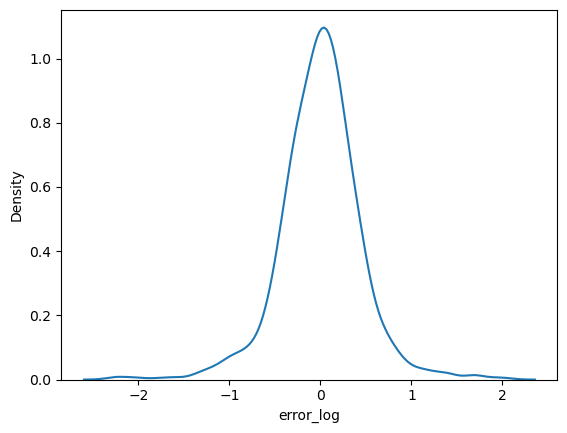

In [2126]:
sns.kdeplot(x = modelData.error_log)

# No heteroskedasticity
Overall, there does not seem to be a relationship between the calculated SalePrice values and the error. This assumption is met!

<Axes: xlabel='calculated_SalePrice', ylabel='error_log'>

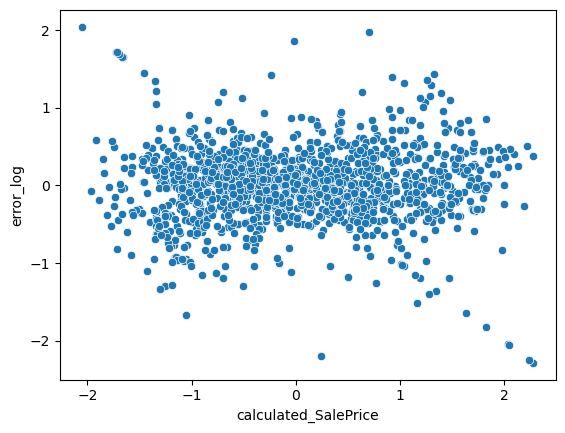

In [2129]:
sns.scatterplot(x = "calculated_SalePrice",y = "error_log", data = modelData)

# No multicollinearity 
**BEFORE FIXING:** Before I fixed the issue in the model, I did have some occureneces of multicollinarity in my model. The VIF scores that were larger than 10 indicated this to me. In addition to those larger than 10, the Duplex BldgType outputted "inf," indicating double representation in my model.

**AFTER FIXING:** After standardizing my numeric variables to standard deviation values and removing the Duplex BldgType from the modelData, the large VIF values were resolved, indicating the model no longer possessed multicollinearity issues.

In [2135]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif['variable'] = predictors.columns
vif

,VIF,variable
0,1.133981,BsmtFullBath_1
1,2.197687,KitchenQual_Ex
2,2.252451,KitchenQual_Gd
3,1.320429,KitchenAbvGr_2
4,1.090991,OverallQual_3
5,1.267157,OverallQual_4
6,1.734439,OverallQual_6
7,2.565183,OverallQual_7
8,2.396415,OverallQual_8
9,1.790243,OverallQual_9


# Model Results
Throughout the course of this project, I deepened my understanding of univariate and bivariate analysis. I cleaned the dataset by analyzing their data types, distributions, null values, and descriptive statistics and made changes accordingly. Ultimately, this cleaning process allowed my multiple linear regression models performance to improve overall.

I achieved an r2 value of 79%, which indicates that 79% of the changes in SalePrice can be explained by my models predictors, indicating good performance.